Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
num_days_R_prediction=42

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=18 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=51
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
#
drop_n_dataset_days=145
#

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
237                           NaN                Thailand  15.870032   
238                           NaN             Timor-Leste  -8.874217   
239                           NaN                    Togo   8.619500   
240                           NaN     Trinidad and Tobago  10.691800   
241                           NaN                 Tunisia  33.886917   
242                           NaN                  Turkey  38.963700   
243                           NaN           United States  40.000000   
244                           NaN                  Uganda   1.373333   
245                           NaN                 Ukraine  48.379400   
246                           NaN    United Arab Emirates  23.424076   
247                      Anguilla          United Kingdom  18.220600   
248                       Bermuda          United Kingdom  32.307800   
249        British Virgin Islands          United Kingdom  18.420700   
250                Cayman Islands          United Kingdom  19.313300   
251               Channel Islands          United Kingdom  49.372300   
252   Falkland Islands (Malvinas)          United Kingdom -51.796300   
253                     Gibraltar          United Kingdom  36.140800   
254                   Isle of Man          United Kingdom  54.236100   
255                    Montserrat          United Kingdom  16.742498   
256      Turks and Caicos Islands          United Kingdom  21.694000   
257                           NaN          United Kingdom  55.378100   
258                           NaN                 Uruguay -32.522800   
259                           NaN              Uzbekistan  41.377491   
260                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
239                           NaN                Thailand  15.870032   
240                           NaN             Timor-Leste  -8.874217   
241                           NaN                    Togo   8.619500   
242                           NaN     Trinidad and Tobago  10.691800   
243                           NaN                 Tunisia  33.886917   
244                           NaN                  Turkey  38.963700   
245                           NaN           United States  40.000000   
246                           NaN                  Uganda   1.373333   
247                           NaN                 Ukraine  48.379400   
248                           NaN    United Arab Emirates  23.424076   
249                      Anguilla          United Kingdom  18.220600   
250                       Bermuda          United Kingdom  32.307800   
251        British Virgin Islands          United Kingdom  18.420700   
252                Cayman Islands          United Kingdom  19.313300   
253               Channel Islands          United Kingdom  49.372300   
254   Falkland Islands (Malvinas)          United Kingdom -51.796300   
255                     Gibraltar          United Kingdom  36.140800   
256                   Isle of Man          United Kingdom  54.236100   
257                    Montserrat          United Kingdom  16.742498   
258      Turks and Caicos Islands          United Kingdom  21.694000   
259                           NaN          United Kingdom  55.378100   
260                           NaN                 Uruguay -32.522800   
261                           NaN              Uzbekistan  41.377491   
262                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/20  \
185        0        0        0        0        0        0  ...        70   
186        0        0        0        0        0        0  ...       128   
187        0        0        0        0        0        0  ...       614   
188        0        0        0        0        0        0  ...        32   
189        0        0        0        0        0        0  ...         2   
190        0        0        0        0        0        0  ...         1   
191        0        0        0        0        0        0  ...        22   
192        0        0        0        0        0        0  ...      6567   
193        0        0        0        0        0        0  ...        25   
194        0        0        0        0        0        0  ...       153   

     10/11/20  10/12/20  10/13/20  10/14/20  10/15/20  10/16/20  10/17/20  \
185        71        72        73        73        73        73        74   
186       128       129       129       130       130       131       131   
187       636       645       663       675       694       715       727   
188        33        33        33        32        32        32        34   
189         2         2         2         2         2         2         3   
190         1         1         1         1         1         1         1   
191        22        22        22        22        22        22        22   
192      6584      6596      6631      6663      6692      6708      6737   
193        25        25        25        25        25        25        25   
194       153       153       154       154       154       154       154   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 276 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/20  \
175        0        0        0        0        0        0  ...      3753   
176        0        0        0        0        0        0  ...        78   
177        0        0        0        0        0        0  ...       308   
178        0        0        0        0        0        0  ...       622   
179        0        0        0        0        0        0  ...         0   
180        0        0        0        0        0        0  ...      1801   
181        0        0        0        0        0        0  ...      4225   
182        0        0        0        0        0        0  ...      1123   
183        0        0        0        0        0        0  ...     51711   
184        0        0        0        0        0        0  ...     16099   

     10/11/20  10/12/20  10/13/20  10/14/20  10/15/20  10/16/20  10/17/20  \
175      3768      3790      3849      3875      3910      3947      3983   
176        78        78        78       111       111       111       120   
177       315       332       343       367       371       391       417   
178       622       632       645       657       657       659       664   
179         0         0         0         0         0         0         0   
180      1801      1808      1809      1809      1809      1818      1819   
181      4225      4225      4225      4225      4225      4225      4225   
182      1123      1124      1124      1124      1124      1126      1126   
183     51735     51943     52006     52143     52194     52304     56557   
184     16194     16301     16397     16591     16758     16949     17111   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 276 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/20  \
185        0        0        0        0        0        0  ...      9844   
186        0        0        0        0        0        0  ...     11891   
187        0        0        0        1        1        1  ...    105684   
188        0        0        0        0        0        0  ...      4188   
189        0        0        0        0        0        0  ...       148   
190        0        0        0        0        0        0  ...       571   
191        0        0        0        0        0        0  ...       707   
192        0        0        0        0        0        0  ...    168280   
193        0        0        0        0        0        0  ...      1871   
194        0        0        0        0        0        0  ...      5264   

     10/11/20  10/12/20  10/13/20  10/14/20  10/15/20  10/16/20  10/17/20  \
185     10001     10088     10258     10392     10537     10612     10707   
186     11936     11989     12000     12069     12103     12215     12263   
187    107755    111802    115358    117996    121745    126137    129304   
188      4194      4197      4229      4255      4285      4289      4304   
189       148       148       148       150       150       150       150   
190       583       585       619       645       673       698       715   
191       710       710       719       729       737       746       749   
192    174653    181498    188876    196163    203954    211938    220052   
193      1871      1872      1874      1876      1880      1883      1886   
194      5264      5264      5353      5353      5353      5353      5353   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 276 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State   Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN       Seychelles  -4.679600   55.492000        0        0   
221            NaN     Sierra Leone   8.460555  -11.779889        0        0   
222            NaN        Singapore   1.283300  103.833300        0        1   
223            NaN         Slovakia  48.669000   19.699000        0        0   
224            NaN         Slovenia  46.151200   14.995500        0        0   
225            NaN  Solomon Islands  -9.645700  160.156200        0        0   
226            NaN          Somalia   5.152149   46.199616        0        0   
227            NaN     South Africa -30.559500   22.937500        0        0   
228            NaN      South Sudan   6.877000   31.307000        0        0   
229            NaN            Spain  40.463667   -3.749220        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/10/20  10/11/20  10/12/20  \
220        0        0        0        0  ...       148       148       148   
221        0        0        0        0  ...      2300      2306      2306   
222        3        3        4        5  ...     57866     57876     57880   
223        0        0        0        0  ...     18797     19851     20355   
224        0        0        0        0  ...      8252      8663      8832   
225        0        0        0        0  ...         0         0         2   
226        0        0        0        0  ...      3847      3864      3864   
227        0        0        0        0  ...    690896    692471    693359   
228        0        0        0        0  ...      2761      2777      2787   
229        0        0        0        0  ...    861112    861112    888968   

     10/13/20  10/14/20  10/15/20  10/16/20  10/17/20   Population   \
220       148       148       148       149       149           NaN   
221      2309      2315      2323      2325      2327           NaN   
222     57884     57889     57892     57901     57904     5,612,000   
223     20886     22296     24225     26300     28268     5,459,087   
224      9231      9938     10683     11517     12416     2,078,878   
225         2         2         3         3         3           NaN   
226      3864      3864      3864      3864      3864           NaN   
227    694537    696414    698184    700203    702131    59,148,674   
228      2798      2798      2807      2817      2817           NaN   
229    896086    908056    921374    936560    936560    46,660,000   

                  region  
220       Seychelles_nan  
221     Sierra Leone_nan  
222        Singapore_nan  
223         Slovakia_nan  
224         Slovenia_nan  
225  Solomon Islands_nan  
226          Somalia_nan  
227     South Africa_nan  
228      South Sudan_nan  
229            Spain_nan  

[10 rows x 276 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

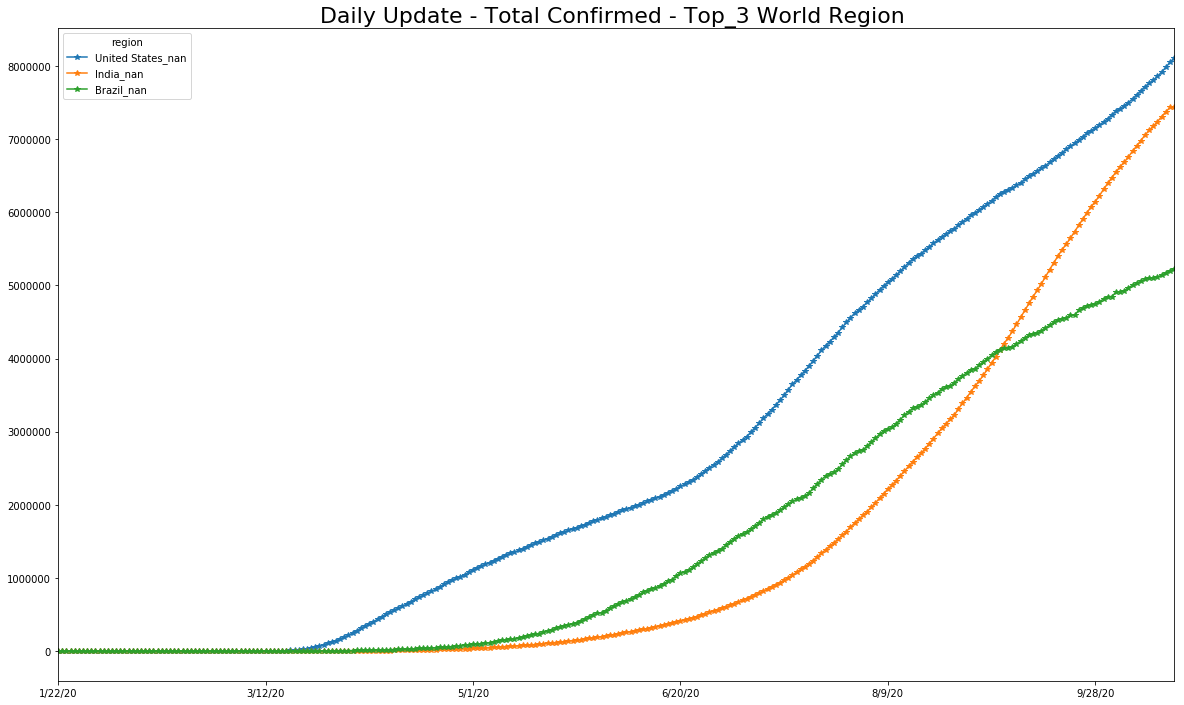

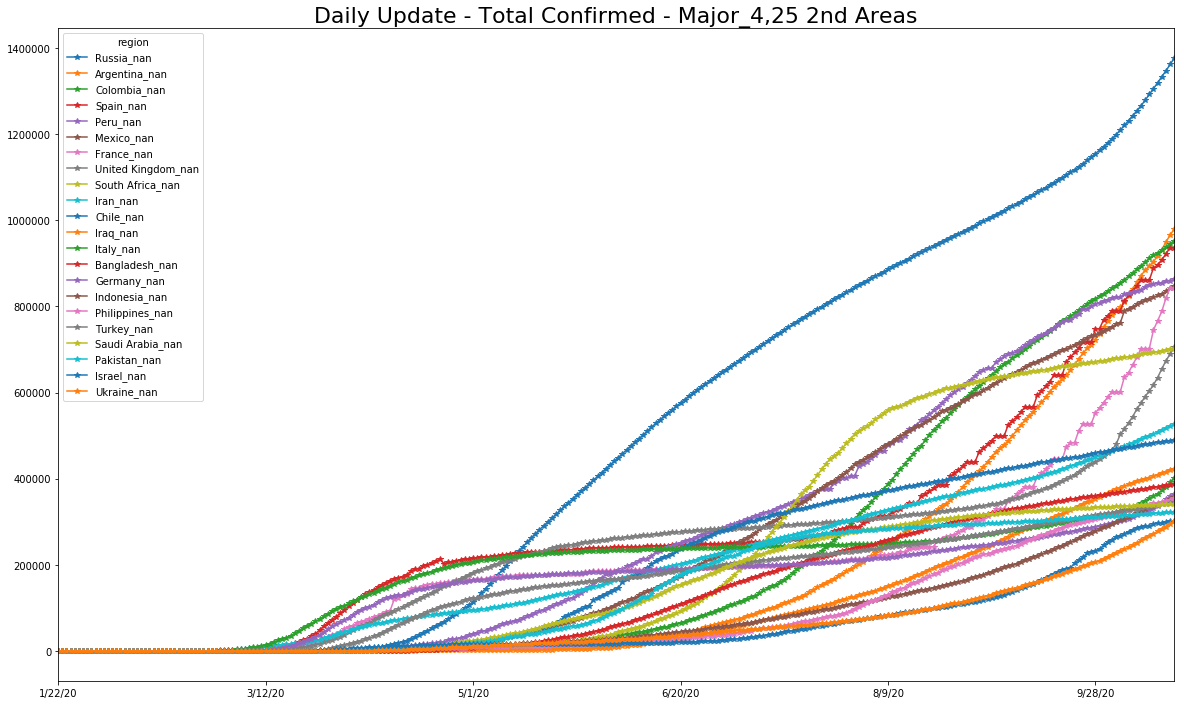

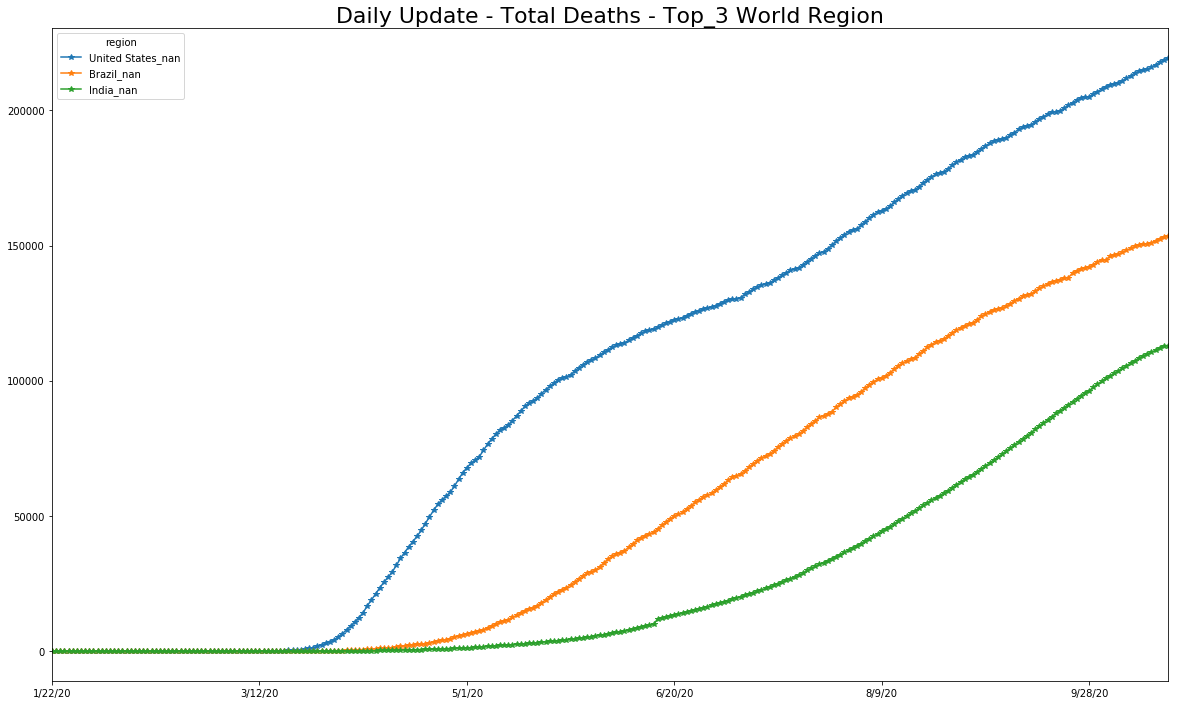

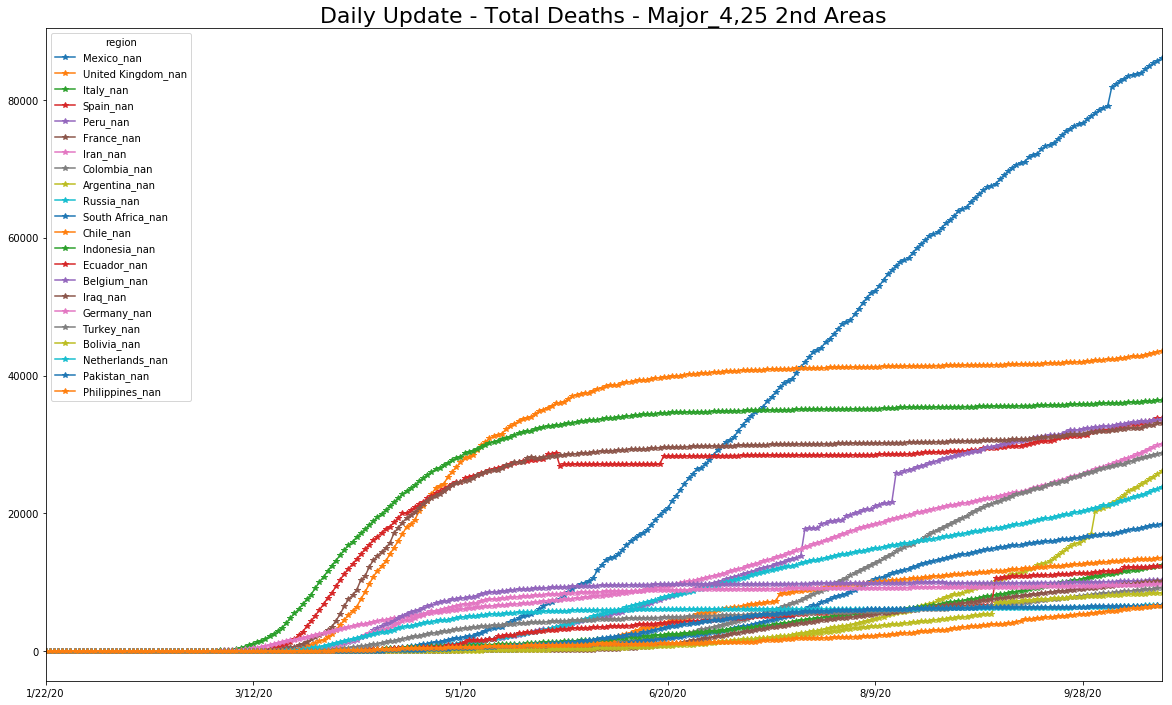

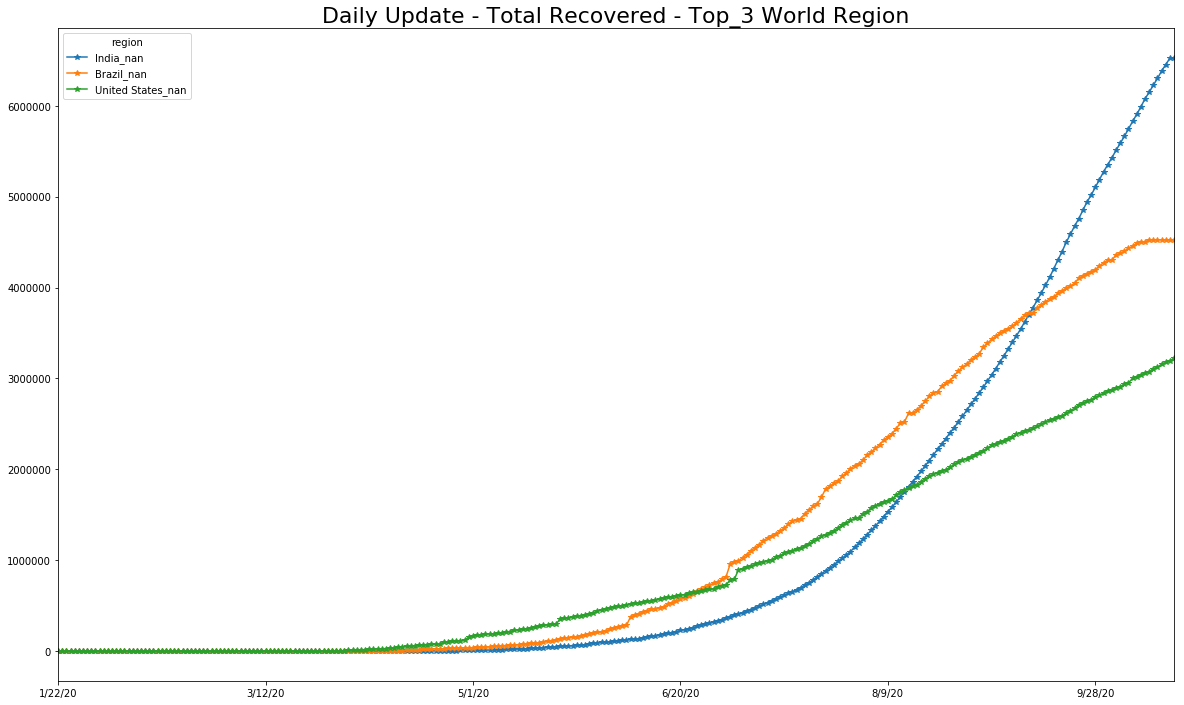

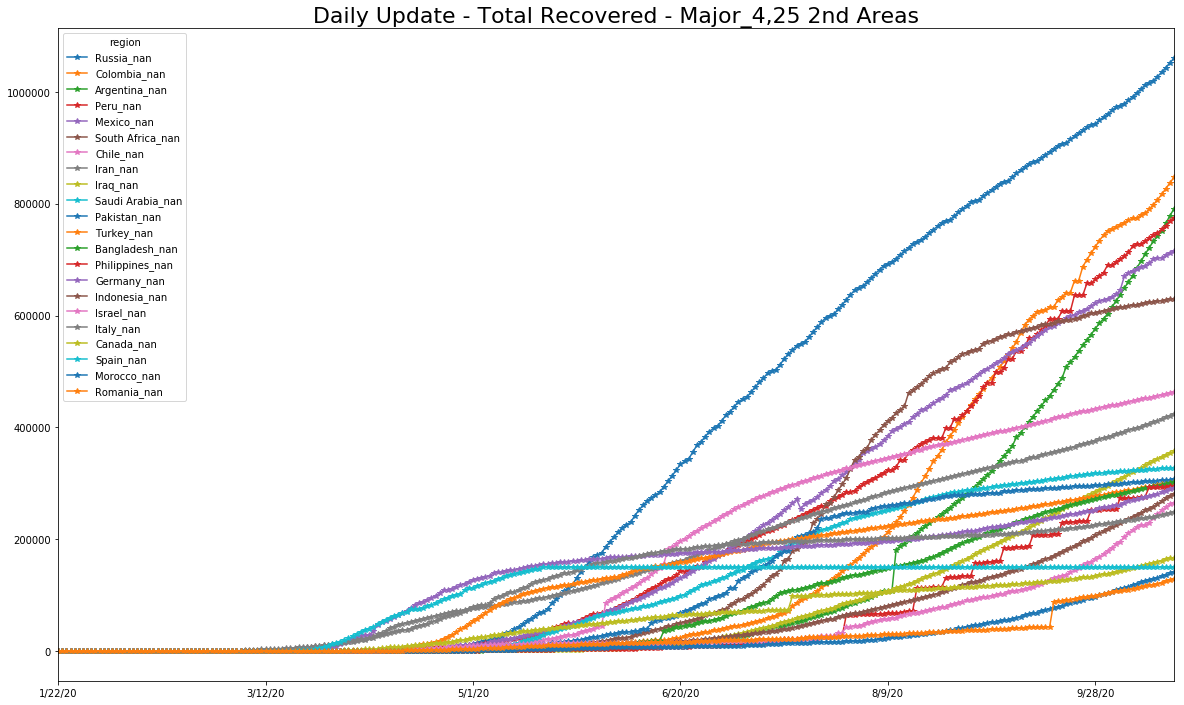

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/10/18


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [23]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/15/20            25527         1590        11031          853         142   
6/16/20            26310         1672        11147          854         148   
6/17/20            26874         1722        11268          854         155   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/15/20                       26          32785        17064   
6/16/20                       26          34159        17489   
6/17/20                       26          35552        18033   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
6/15/20                                     108                       3134   
6/16/20                                     108                       3135   
6/17/20                                     108                       3137   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/15/20  ...            2111207          848            5263           3062   
6/16/20  ...            2135002          849            5493           3150   
6/17/20  ...            2160906          849            5682           3386   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/15/20          334                     505                   9        844   
6/16/20          334                     514                   9        885   
6/17/20          335                     555                   9        902   

region   Zambia_nan  Zimbabwe_nan  
6/15/20        1382           387  
6/16/20        1405           391  
6/17/20        1412           401  

[3 rows x 267 columns]

In [24]:
ts[-4:]

region    Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/14/20            39994        15955        53584         3190        6846   
10/15/20            40026        16212        53777         3190        7096   
10/16/20            40073        16501        53998         3377        7222   
10/17/20            40141        16774        54203         3377        7462   

region    Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/14/20                      112         931967        58624   
10/15/20                      112         949063        59995   
10/16/20                      112         965609        61460   
10/17/20                      119         979119        63000   

region    Australia_Australian Capital Territory  Australia_New South Wales  \
10/14/20                                     113                       4321   
10/15/20                                     113                       4326   
10/16/20                                     113                       4333   
10/17/20                                     113                       4338   

region    ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
10/14/20  ...            7916099         2388           61950          85005   
10/15/20  ...            7979709         2417           62278          85469   
10/16/20  ...            8048865         2450           62588          85758   
10/17/20  ...            8106384         2501           62809          86289   

region    Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
10/14/20         1122                   45658                  10       2053   
10/15/20         1124                   46100                  10       2053   
10/16/20         1124                   46434                  10       2055   
10/17/20         1126                   46746                  10       2055   

region    Zambia_nan  Zimbabwe_nan  
10/14/20       15616          8055  
10/15/20       15659          8075  
10/16/20       15659          8099  
10/17/20       15789          8110  

[4 rows x 267 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-06-16  Afghanistan_nan      26310             0             0   
2     2020-06-17  Afghanistan_nan      26874           783             0   
3     2020-06-18  Afghanistan_nan      27532           564             0   
4     2020-06-19  Afghanistan_nan      27878           658          2005   
5     2020-06-20  Afghanistan_nan      28424           346          1568   
6     2020-06-21  Afghanistan_nan      28833           546          1550   
7     2020-06-22  Afghanistan_nan      29157           409          1301   
8     2020-06-23  Afghanistan_nan      29481           324          1279   
9     2020-06-24  Afghanistan_nan      29640           324          1057   
10    2020-06-25  Afghanistan_nan      30175           159           807   
11    2020-06-26  Afghanistan_nan      30451           535          1018   
12    2020-06-27  Afghanistan_nan      30616           276           970   
13    2020-06-28  Afghanistan_nan      30967           165           976   
14    2020-06-29  Afghanistan_nan      31238           351           792   
15    2020-06-30  Afghanistan_nan      31517           271           787   
16    2020-07-01  Afghanistan_nan      31836           279           901   
17    2020-07-02  Afghanistan_nan      32022           319           869   
18    2020-07-03  Afghanistan_nan      32324           186           784   
19    2020-07-04  Afghanistan_nan      32672           302           807   
20    2020-07-05  Afghanistan_nan      32951           348           836   
21    2020-07-06  Afghanistan_nan      33190           279           929   
22    2020-07-07  Afghanistan_nan      33384           239           866   
23    2020-07-08  Afghanistan_nan      33594           194           712   
24    2020-07-09  Afghanistan_nan      33908           210           643   
25    2020-07-10  Afghanistan_nan      34194           314           718   
26    2020-07-11  Afghanistan_nan      34366           286           810   
27    2020-07-12  Afghanistan_nan      34451           172           772   
28    2020-07-13  Afghanistan_nan      34455            85           543   
29    2020-07-14  Afghanistan_nan      34740             4           261   
30    2020-07-15  Afghanistan_nan      34994           285           374   
...          ...              ...        ...           ...           ...   
33864 2020-09-19     Zimbabwe_nan       7672            14            71   
33865 2020-09-20     Zimbabwe_nan       7683            25            74   
33866 2020-09-21     Zimbabwe_nan       7683            11            50   
33867 2020-09-22     Zimbabwe_nan       7711             0            36   
33868 2020-09-23     Zimbabwe_nan       7725            28            39   
33869 2020-09-24     Zimbabwe_nan       7752            14            42   
33870 2020-09-25     Zimbabwe_nan       7787            27            69   
33871 2020-09-26     Zimbabwe_nan       7803            35            76   
33872 2020-09-27     Zimbabwe_nan       7812            16            78   
33873 2020-09-28     Zimbabwe_nan       7816             9            60   
33874 2020-09-29     Zimbabwe_nan       7837             4            29   
33875 2020-09-30     Zimbabwe_nan       7838            21            34   
33876 2020-10-01     Zimbabwe_nan       7850             1            26   
33877 2020-10-02     Zimbabwe_nan       7858            12            34   
33878 2020-10-03     Zimbabwe_nan       7885             8            21   
33879 2020-10-04     Zimbabwe_nan       7888            27            47   
33880 2020-10-05     Zimbabwe_nan       7898             3            38   
33881 2020-10-06     Zimbabwe_nan       7915            10            40   
33882 2020-10-07     Zimbabwe_nan       7919            17            30   
33883 2020-10-08     Zimbabwe_nan       7951             4            31   
33884 2020-10-09     Zimbabwe_nan       7994            32  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
33893 2020-10-18  Zimbabwe_nan          0            11            55   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
33893           100         100.135943          100.68293         101.248564   

       last_day  kalman_prediction  population  infected_rate  min  max  
33893      8110             8128.0    14862924       0.000005  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
33891  2020-10-16  Zimbabwe_nan       8099            20            54   
33892  2020-10-17  Zimbabwe_nan       8110            24            63   
33893  2020-10-18  Zimbabwe_nan          0            11            55   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
33891           124         100.248417         100.673357         101.559678   
33892           105         100.297337         100.784097         101.313610   
33893           100         100.135943         100.682930         101.248564   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
33891                 8075  ...    14862924       0.000005  NaN  NaN   
33892                 8099  ...    14862924       0.000005  NaN  NaN   
33893                 8110  ...    14862924       0.000005  NaN  NaN   

       population_percentage : infected_rate confirmed  \
33891                                         0.000543   
33892                                         0.000545   
33893                                         0.000546   

       population_percentage : factor 9/10 infected_rate confirmed  \
33891                                           0.005434             
33892                                           0.005450             
33893                                           0.005457             

       delta : new_cases  delta : new_cases per 1M hab  \
33891               15.0                      1.009223   
33892               12.0                      0.807378   
33893               18.0                      1.211067   

       delta : roling 7day AVG  \
33891                17.714286   
33892                15.000000   
33893                14.285714   

       delta : aprox 14-day case notification rate per 100k hab  
33891                                           1.668581         
33892                                           1.412912         
33893                                           1.345630         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse       mae
257  United States_nan  5.334099e+11  730349.173497  76952.08


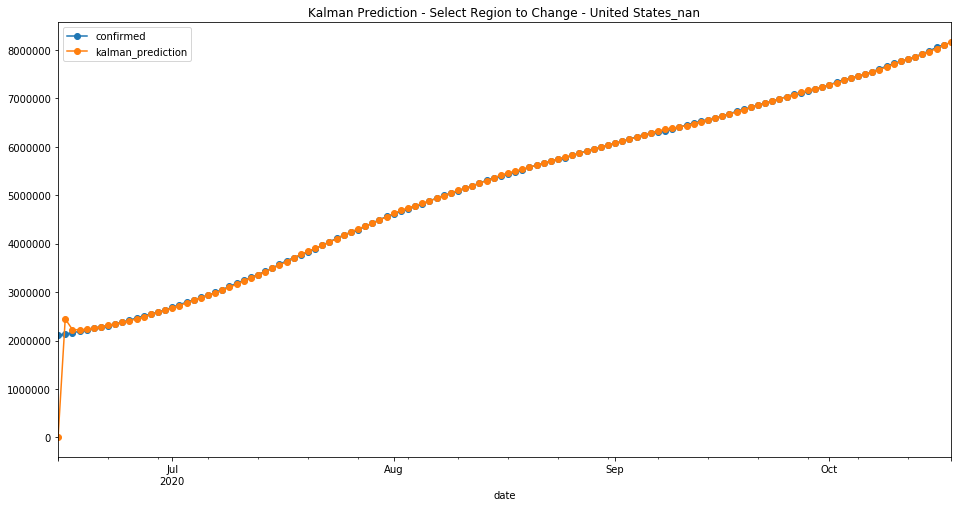

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse        mae
208  Russia_nan  1.548961e+10  124457.244588  12728.632


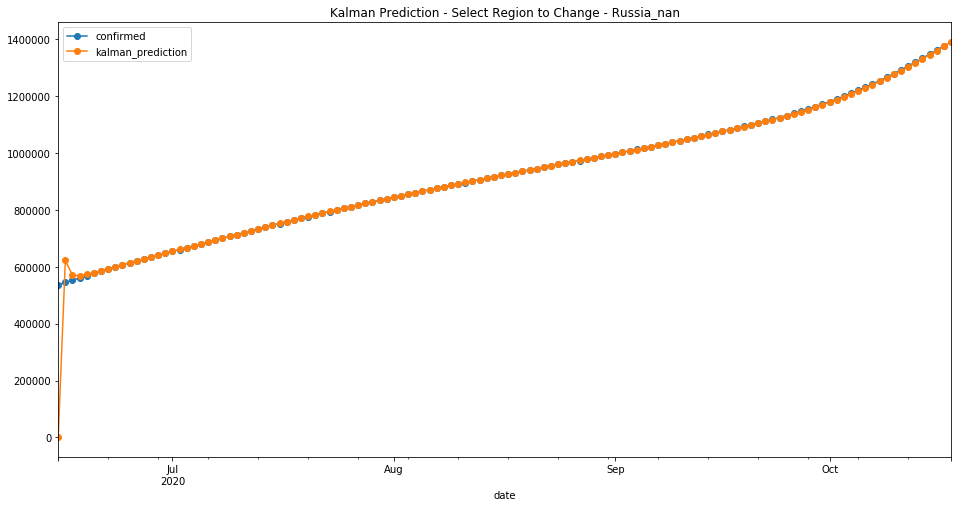

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse        mae
30  Brazil_nan  2.201750e+11  469228.083773  57614.464


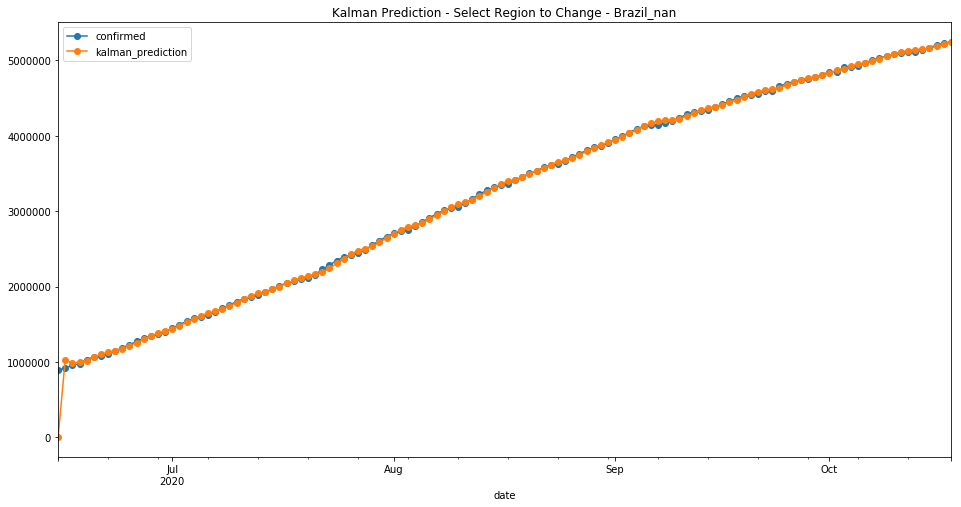

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse     mae
256  United Kingdom_nan  4.195812e+09  64775.088095  7363.8


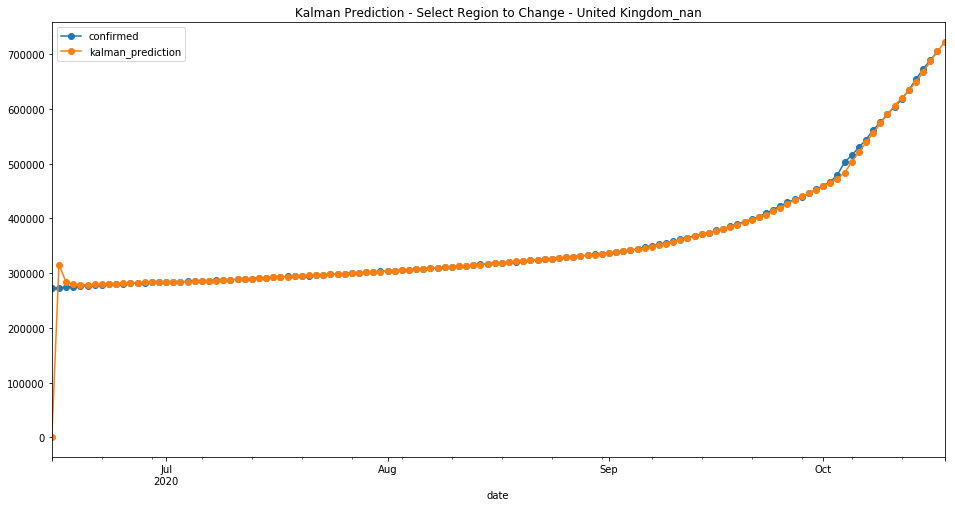

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5ucq7eb7
  JVM stdout: /tmp/tmp5ucq7eb7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5ucq7eb7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_aep8sx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.543 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-09-30
last_train_date= 2020-10-17
first_bootstrap_date= 2020-10-09
boost_bootstrap_date= 2020-10-14
first_test_date= 2020-10-08
last_test_date= 2020-10-18
first_valid_date= 2020-10-16


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   39748.0      39693 2020-10-09  Afghanistan_nan
1   39834.0      39703 2020-10-10  Afghanistan_nan
2   39854.0      39799 2020-10-11  Afghanistan_nan
3   39959.0      39870 2020-10-12  Afghanistan_nan
4   40025.0      39928 2020-10-13  Afghanistan_nan
5   40085.0      39994 2020-10-14  Afghanistan_nan
6   40156.0      40026 2020-10-15  Afghanistan_nan
7   40189.0      40073 2020-10-16  Afghanistan_nan
8   40239.0      40141 2020-10-17  Afghanistan_nan
9   40300.0          0 2020-10-18  Afghanistan_nan
10  15125.0      15066 2020-10-09      Albania_nan
11  15298.0      15231 2020-10-10      Albania_nan
12  15469.0      15399 2020-10-11      Albania_nan
13  15640.0      15570 2020-10-12      Albania_nan
14  15814.0      15752 2020-10-13      Albania_nan
15  15994.0      15955 2020-10-14      Albania_nan
16  16192.0      16212 2020-10-15      Albania_nan
17  16431.0      16501 2020-10-16      Albania_nan
18  16715.0      16774 2020-10-17      Albania_nan
19  17011.0          0 2020-10-18      Albania_nan
20  52892.0      52804 2020-10-09      Algeria_nan
21  53031.0      52940 2020-10-10      Algeria_nan
22  53161.0      53072 2020-10-11      Algeria_nan
23  53294.0      53325 2020-10-12      Algeria_nan
24  53551.0      53399 2020-10-13      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  42685.0      42750 2020-10-14  Azerbaijan_nan
176  43044.0      43280 2020-10-15  Azerbaijan_nan
177  43567.0      43789 2020-10-16  Azerbaijan_nan
178  44091.0      44317 2020-10-17  Azerbaijan_nan
179  44675.0          0 2020-10-18  Azerbaijan_nan
180   4978.0       4713 2020-10-09     Bahamas_nan
181   4977.0       5023 2020-10-10     Bahamas_nan
182   4691.0       5078 2020-10-11     Bahamas_nan
183   5232.0       5163 2020-10-12     Bahamas_nan
184   5303.0       5163 2020-10-13     Bahamas_nan
185   5439.0       5191 2020-10-14     Bahamas_nan
186   5411.0       5385 2020-10-15     Bahamas_nan
187   5312.0       5517 2020-10-16     Bahamas_nan
188   5554.0       5628 2020-10-17     Bahamas_nan
189   5707.0          0 2020-10-18     Bahamas_nan
190  75194.0      74860 2020-10-09     Bahrain_nan
191  75613.0      75287 2020-10-10     Bahrain_nan
192  76052.0      75614 2020-10-11     Bahrain_nan
193  76380.0      75948 2020-10-12     Bahrain_nan
194  76728.0      76272 2020-10-13     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220   82518.0      82471 2020-10-09  Belarus_nan
221   83020.0      82471 2020-10-10  Belarus_nan
222   82988.0      83534 2020-10-11  Belarus_nan
223   84192.0      83998 2020-10-12  Belarus_nan
224   84491.0      84524 2020-10-13  Belarus_nan
225   85073.0      85121 2020-10-14  Belarus_nan
226   85747.0      85734 2020-10-15  Belarus_nan
227   86377.0      86392 2020-10-16  Belarus_nan
228   87058.0      87063 2020-10-17  Belarus_nan
229   87735.0          0 2020-10-18  Belarus_nan
230  146657.0     148981 2020-10-09  Belgium_nan
231  151853.0     156931 2020-10-10  Belgium_nan
232  160623.0     162258 2020-10-11  Belgium_nan
233  166007.0     165880 2020-10-12  Belgium_nan
234  170397.0     173240 2020-10-13  Belgium_nan
235  179233.0     181511 2020-10-14  Belgium_nan
236  187490.0     191959 2020-10-15  Belgium_nan
237  198311.0     202151 2020-10-16  Belgium_nan
238  208799.0     213115 2020-10-17  Belgium_nan
239  220802.0          0 2020-10-18  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [max, min]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  919680809.4809011
# MSE on the validation data =  1313699268888.0051
# R^2 on the training data =  0.999429875015837
# R^2 on the validation data =  0.471397832679631


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602998160793_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           15897861.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       20.0       23.0        22.9      1628.0      2628.0     2490.156



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 919680809.4809011
RMSE: 30326.239619855627
MAE: 3294.2951870186275
RMSLE: 0.3234443690656054
Mean Residual Deviance: 919680809.4809011

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1313699268888.0051
RMSE: 1146167.2080844073
MAE: 270993.49122339673
RMSLE: 6.837049464888838
Mean Residual Deviance: 1313699268888.0051

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-10-18 05:16:06   0.053 sec              0.0            NaN   
1     2020-10-18 05:16:07   0.360 sec              1.0   55134.486334   
2     2020-10-18 05:16:07   0.482 sec              2.0   47181.121190   
3     2020-10-18 05:16:07   0.546 sec              3.0   47818.764055   
4     2020-10-18 05:16:07   0.635 sec              4.0   48619.187646   
5     2020-10-18 05:16:07   0.781 sec              5.0   43527.986894   
6     2020-10-18 05:16:07   0.960 sec              6.0   37574.693466   
7     2020-10-18 05:16:07   1.006 sec              7.0   36038.232013   
8     2020-10-18 05:16:07   1.042 sec              8.0   33842.614334   
9     2020-10-18 05:16:07   1.086 sec              9.0   37144.529731   
10    2020-10-18 05:16:07   1.125 sec             10.0   32876.760613   
11    2020-10-18 05:16:08   1.182 sec             11.0   33681.914996   
12    2020-10-18 05:16:08   1.223 sec             12.0   42857.756026   
13    2020-10-18 05:16:08   1.272 sec             13.0   39580.287042   
14    2020-10-18 05:16:08   1.354 sec             14.0   37211.753305   
15    2020-10-18 05:16:08   1.412 sec             15.0   37528.403804   
16    2020-10-18 05:16:08   1.462 sec             16.0   38544.199975   
17    2020-10-18 05:16:08   1.510 sec             17.0   35474.451129   
18    2020-10-18 05:16:08   1.550 sec             18.0   34941.726011   
19    2020-10-18 05:16:08   1.591 sec             19.0   34066.579099   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1    9911.446449       3.039812e+09     1.212661e+06   280793.262168   
2    8977.857308       2.226058e+09     1.196426e+06   277029.888481   
3    9604.252332       2.286634e+09     1.180779e+06   275146.620160   
4    9459.274576       2.363825e+09     1.177938e+06   274695.309232   
5    9242.156200       1.894686e+09     1.173799e+06   274769.976539   
6    8152.450472       1.411858e+09     1.173296e+06   274375.590288   
7    7511.129533       1.298754e+09     1.174255e+06   274187.192124   
8    7105.957577       1.145323e+09     1.171718e+06   273587.983732   
9    7431.154329       1.379716e+09     1.121823e+06   264498.436854   
10   6947.152494       1.080881e+09     1.127197e+06   265253.919474   
11   6716.562237       1.134471e+09     1.130570e+06   265490.518065   
12   7285.108319       1.836787e+09     1.134273e+06   265943.595139   
13   6881.363836       1.566599e+09     1.136303e+06   266261.830541   
14   6695.113606       1.384715e+09     1.139457e+06   267010.180403   
15   6782.442276       1.408381e+09     1.120903e+06   263228.339120   
16   6652.193219       1.485655e+09     1.124537e+06   263995.047783   
17   6390.343330       1.258437e+09     1.126841e+06   264299.145628   
18   6158.700383       1.220924e+09     1.129491e+06   264738.608900   
19   5954.666749       1.160532e+09     1.131890e+06   265189.186148   

    validation_deviance  
0                   NaN  
1          1.470547e+12  
2          1.431436e+12  
3          1.394239e+12  
4          1.387537e+12  
5          1.377805e+12  
6          1.376623e+12  
7          1.378875e+12  
8          1.372923e+12  
9          1.258487e+12  
10         1.270573e+12  
11         1.278188e+12  
12         1.286576e+12  
13         1.291184e+12  
14         1.298362e+12  
15         1.256424e+12  
16         1.264584e+12  
17         1.269771e+12  
18         1.275749e+12  
19         1.281175e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           last_day         1.166558e+18           1.000000    0.306503
1  kalman_prediction         9.877955e+17           0.846761    0.259535
2       7_day_change         6.255346e+17           0.536222    0.164354
3             region         4.180872e+17           0.358394    0.109849
4       3_day_change         2.888503e+17           0.247609    0.075893
5       1_day_change         1.895187e+17           0.162460    0.049794
6  7_day_change_rate         3.500845e+16           0.030010    0.009198
7      infected_rate         3.398145e+16           0.029130    0.008928
8  3_day_change_rate         3.106354e+16           0.026628    0.008162
9  1_day_change_rate         2.962210e+16           0.025393    0.007783

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0           last_day         1.166558e+18           1.000000    0.306503
1  kalman_prediction         9.877955e+17           0.846761    0.259535
2       7_day_change         6.255346e+17           0.536222    0.164354
3             region         4.180872e+17           0.358394    0.109849
4       3_day_change         2.888503e+17           0.247609    0.075893
5       1_day_change         1.895187e+17           0.162460    0.049794
6  7_day_change_rate         3.500845e+16           0.030010    0.009198
7      infected_rate         3.398145e+16           0.029130    0.008928
8  3_day_change_rate         3.106354e+16           0.026628    0.008162
9  1_day_change_rate         2.962210e+16           0.025393    0.007783

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


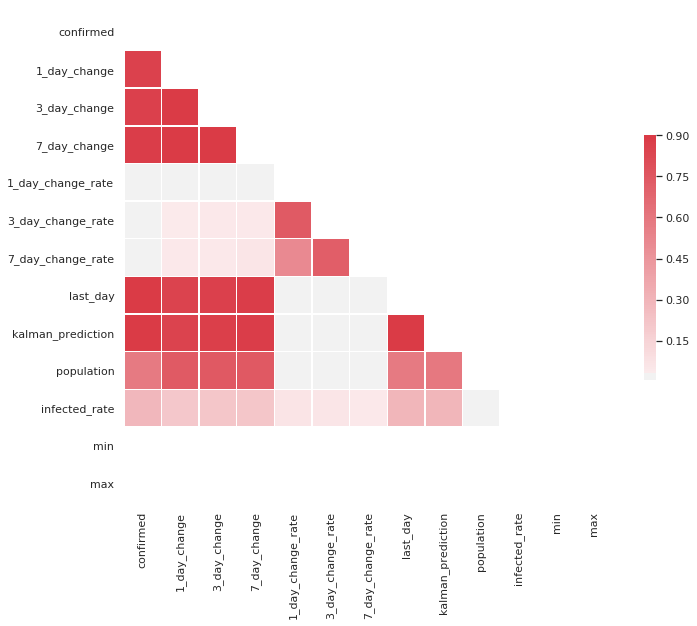

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.854692
3_day_change         0.866399
7_day_change         0.876399
1_day_change_rate    0.018944
3_day_change_rate    0.020823
7_day_change_rate    0.022359
last_day             0.988333
kalman_prediction    0.988821
population           0.588651
infected_rate        0.287882
min                       NaN
max                       NaN
Name: confirmed, dtype: float64


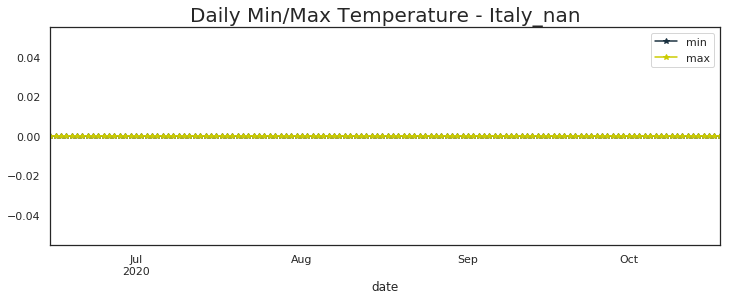

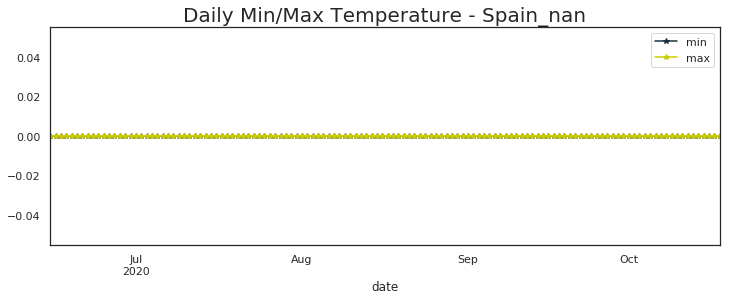

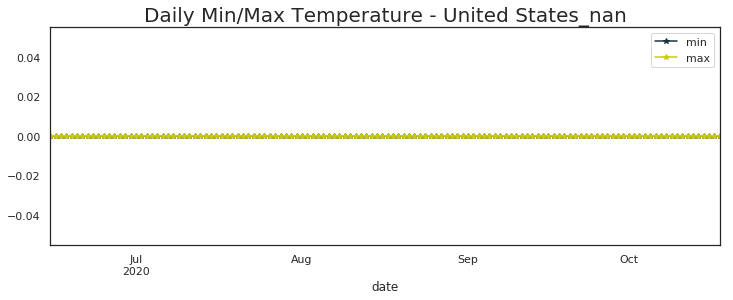

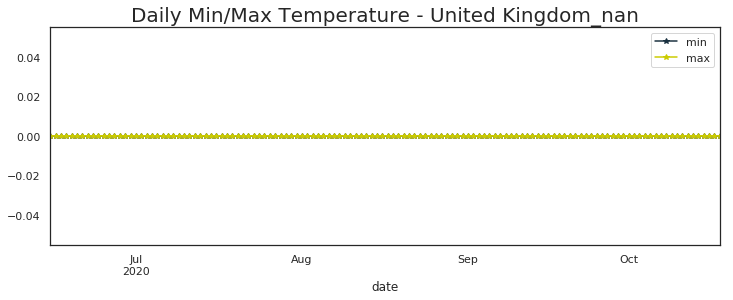

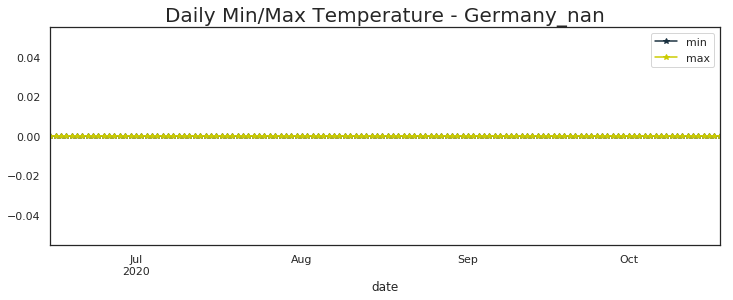

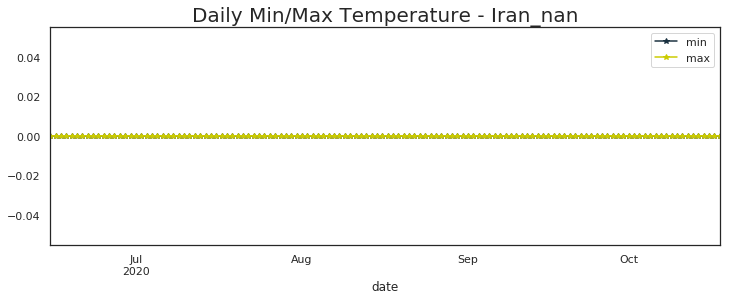

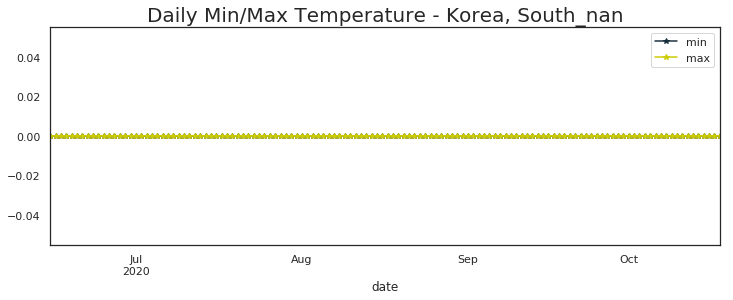

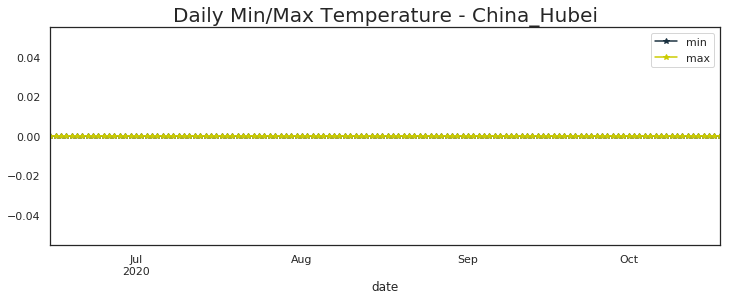

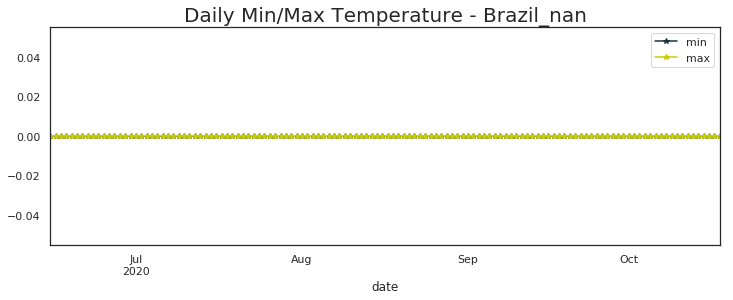

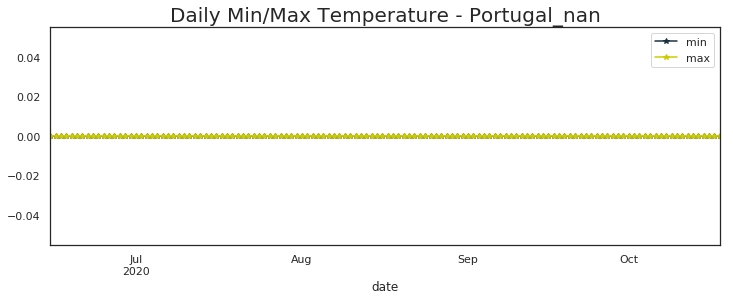

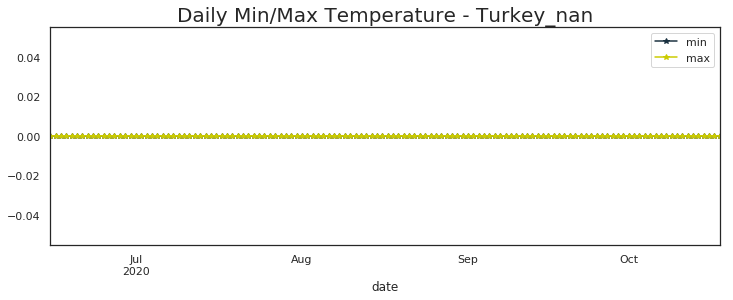

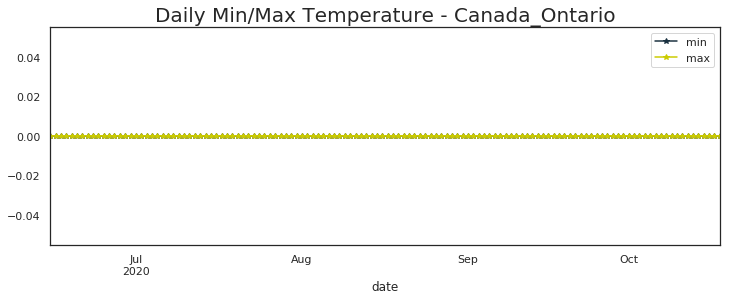

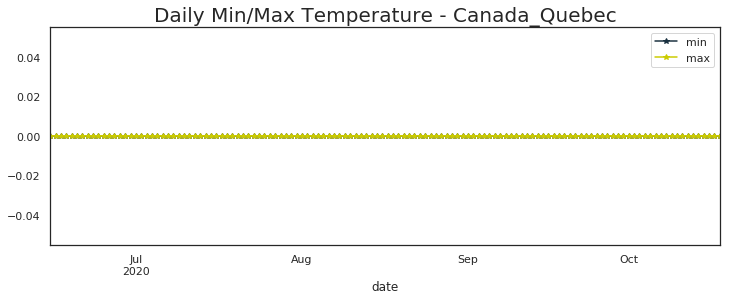

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                            min  max
region                              
United States_nan           0.0  0.0
India_nan                   0.0  0.0
Brazil_nan                  0.0  0.0
Russia_nan                  0.0  0.0
Argentina_nan               0.0  0.0
Colombia_nan                0.0  0.0
Spain_nan                   0.0  0.0
Peru_nan                    0.0  0.0
Mexico_nan                  0.0  0.0
France_nan                  0.0  0.0
United Kingdom_nan          0.0  0.0
South Africa_nan            0.0  0.0
Iran_nan                    0.0  0.0
Chile_nan                   0.0  0.0
Iraq_nan                    0.0  0.0
Italy_nan                   0.0  0.0
Bangladesh_nan              0.0  0.0
Germany_nan                 0.0  0.0
Indonesia_nan               0.0  0.0
Philippines_nan             0.0  0.0
Turkey_nan                  0.0  0.0
Saudi Arabia_nan            0.0  0.0
Pakistan_nan                0.0  0.0
Israel_nan                  0.0  0.0
Uk

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

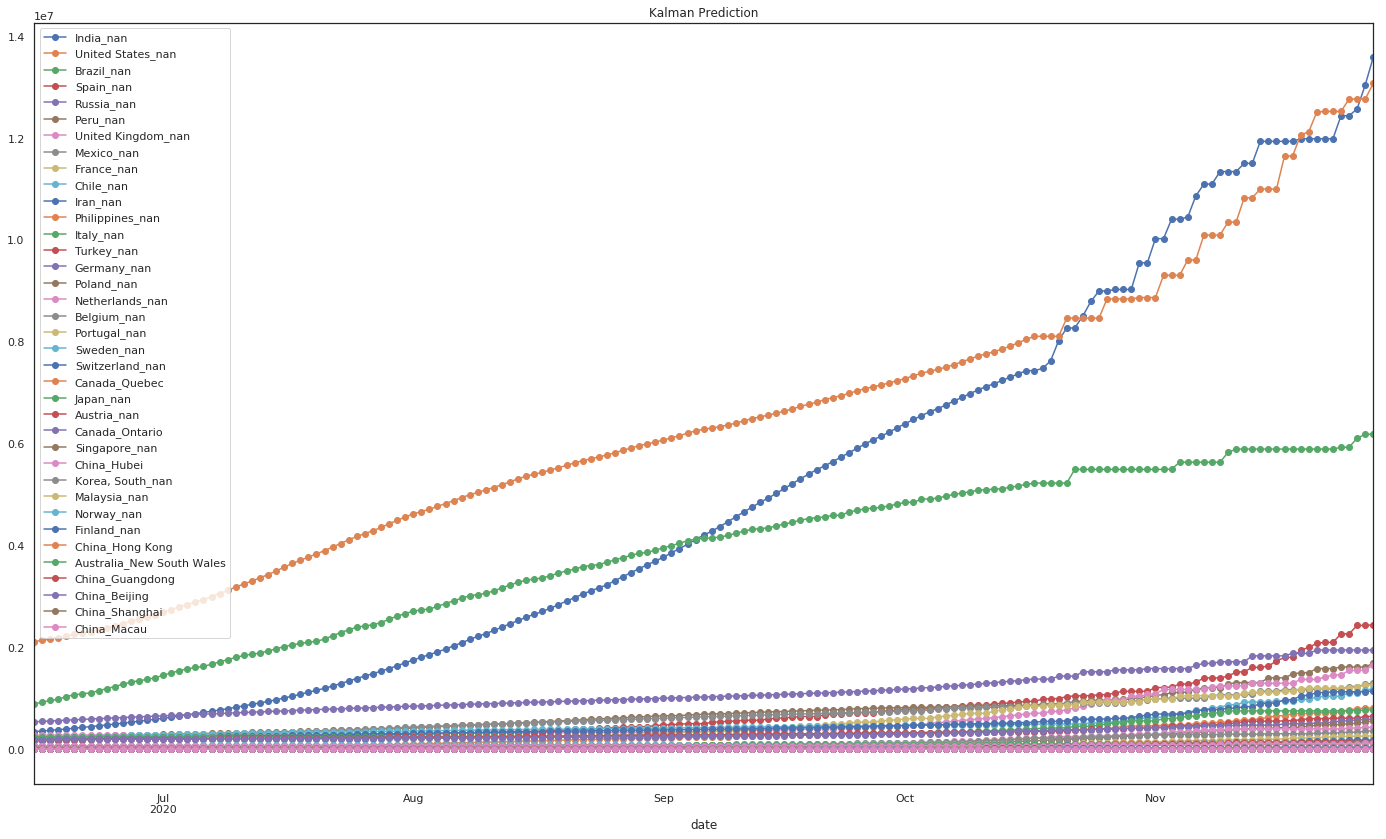

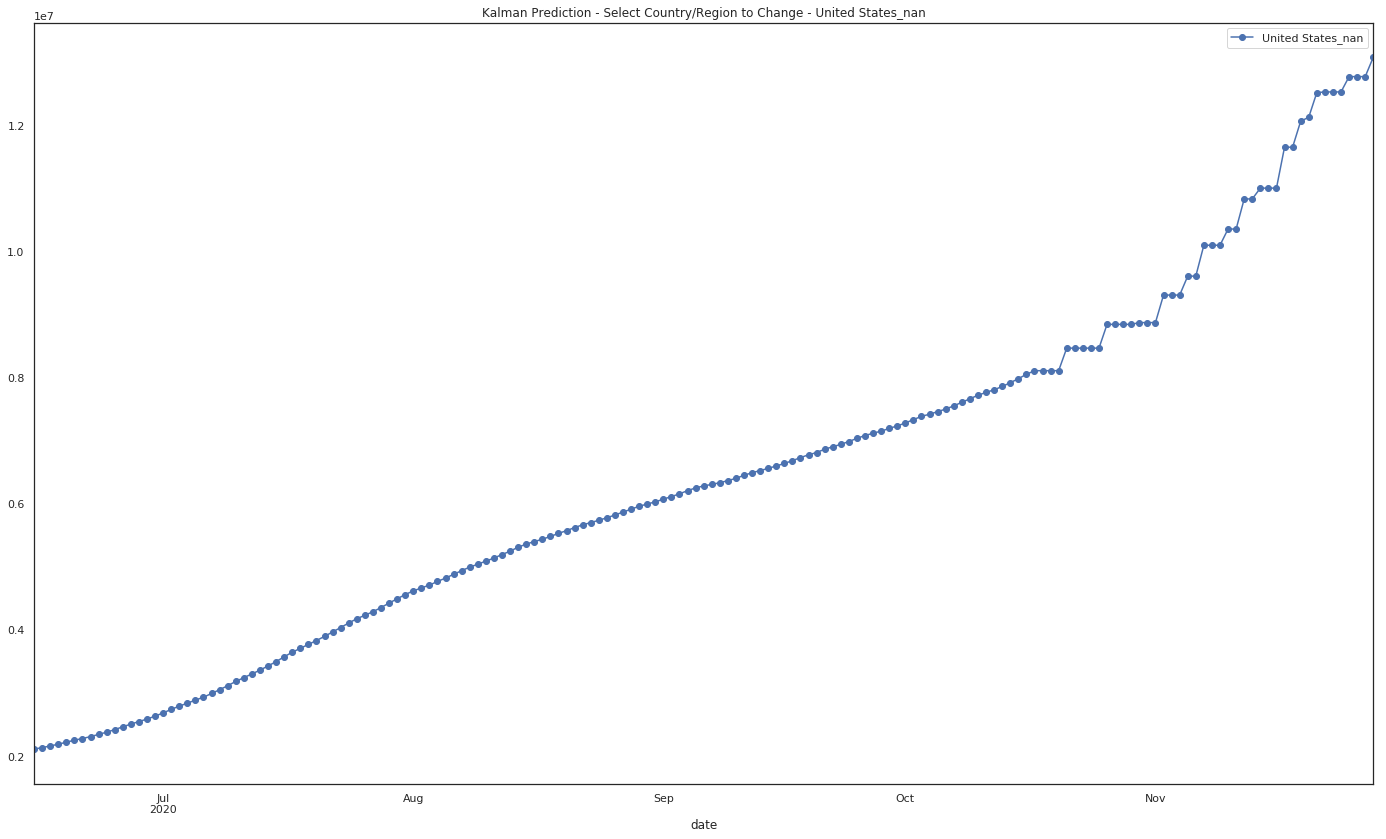

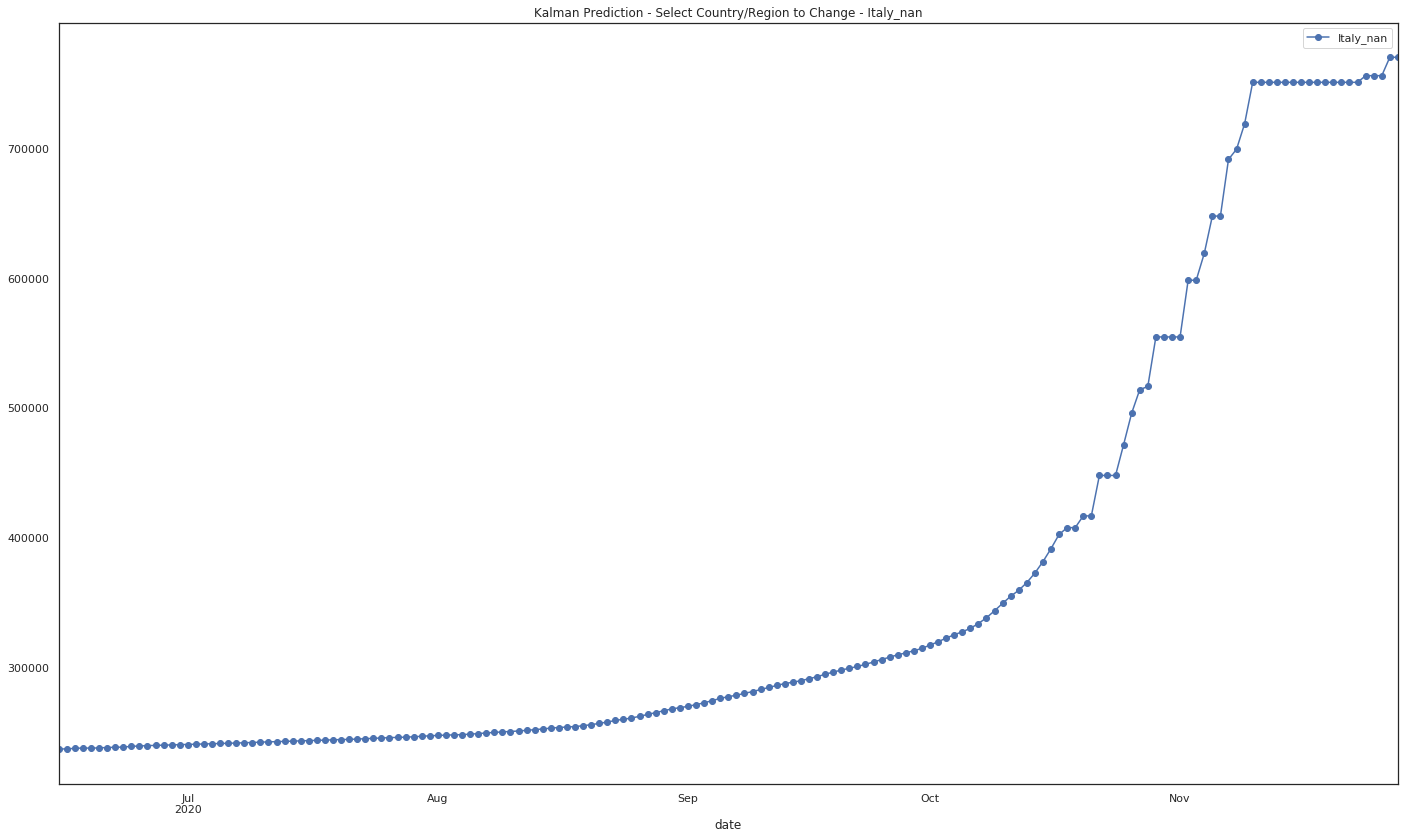

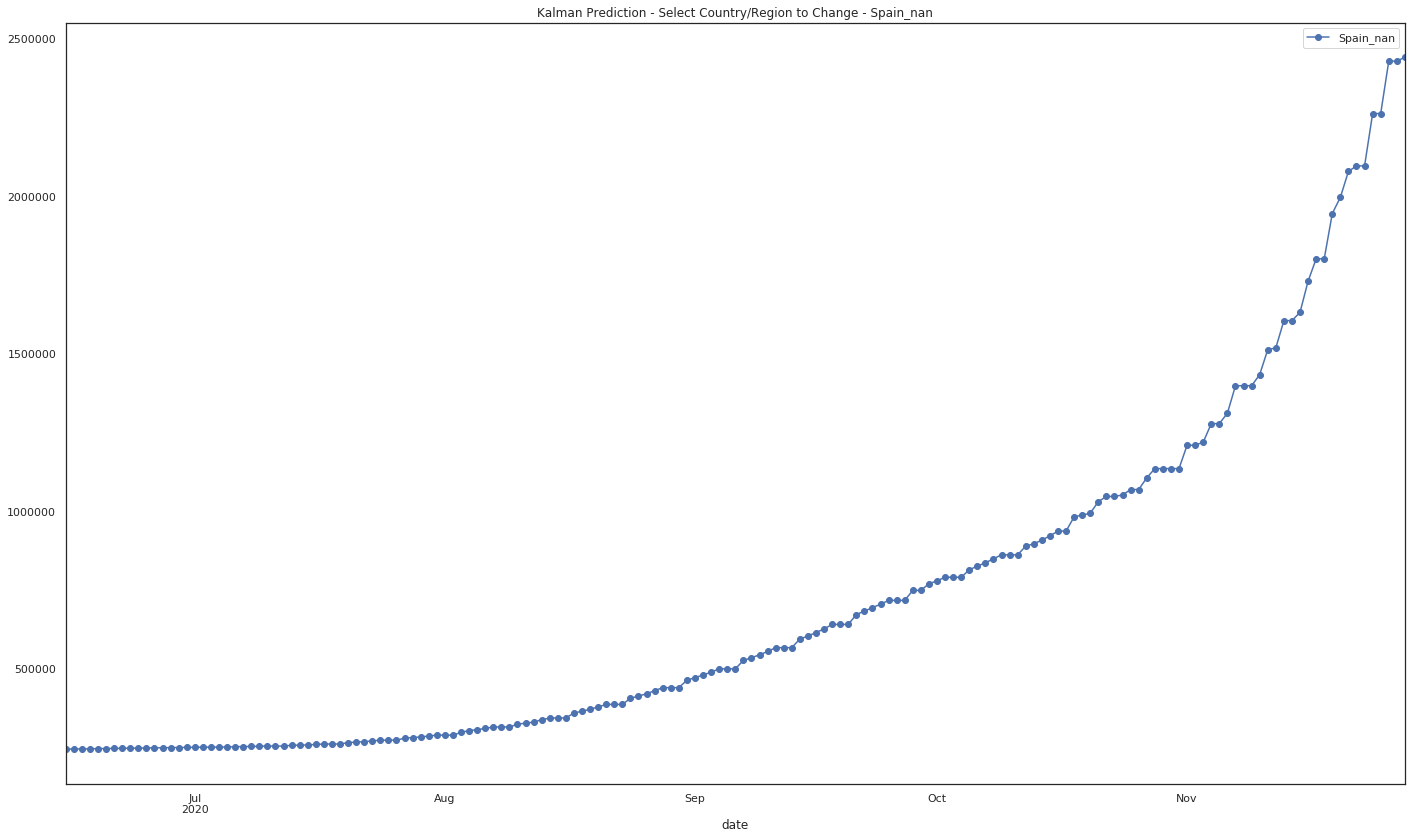

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


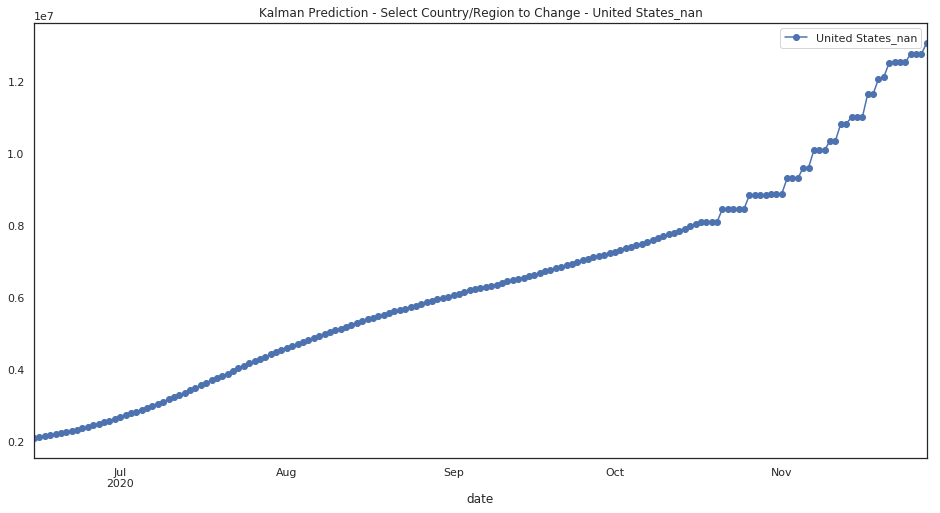

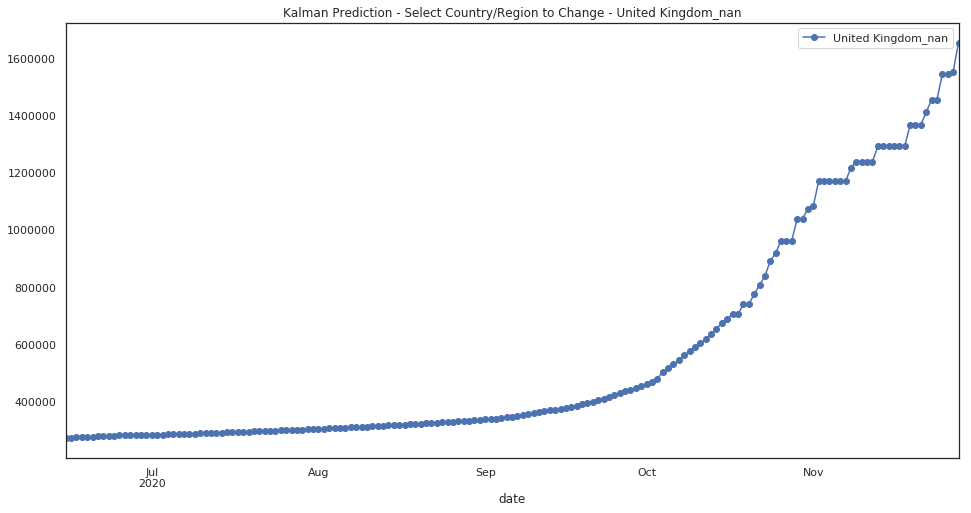

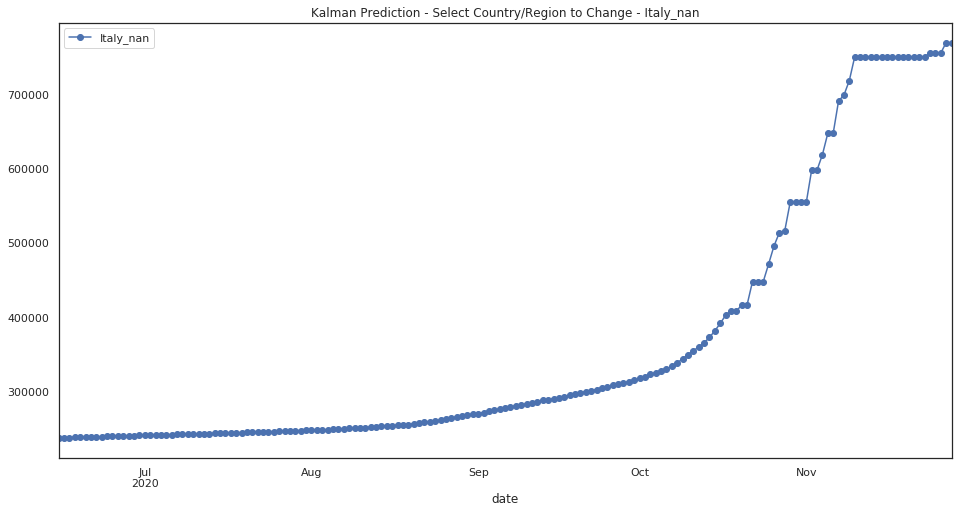

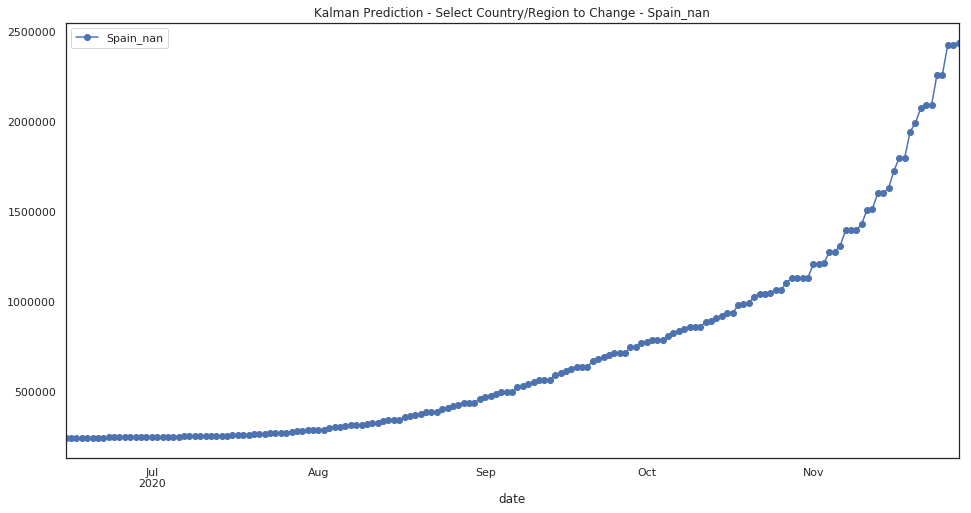

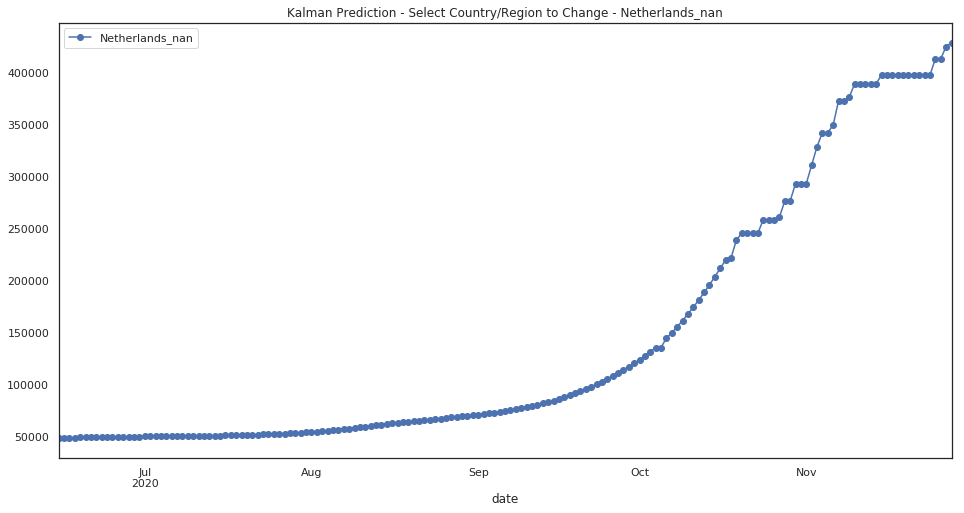

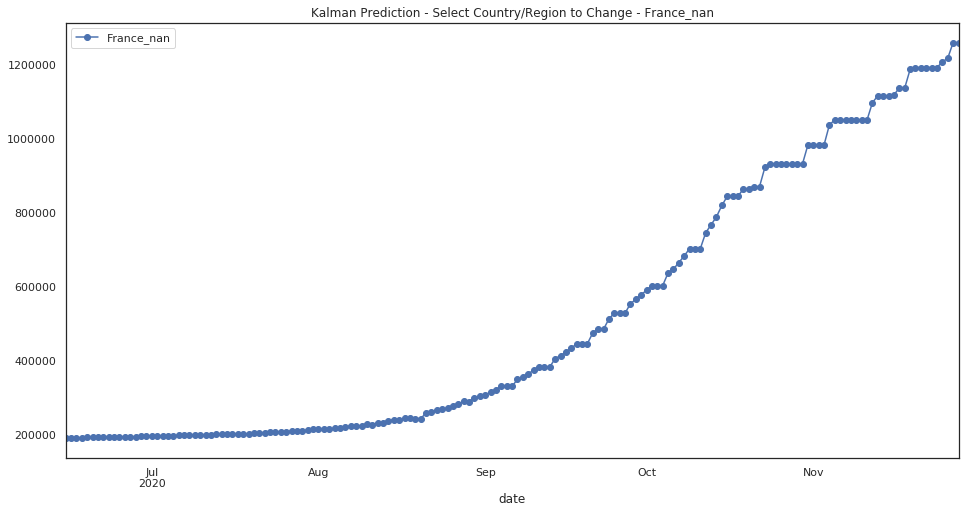

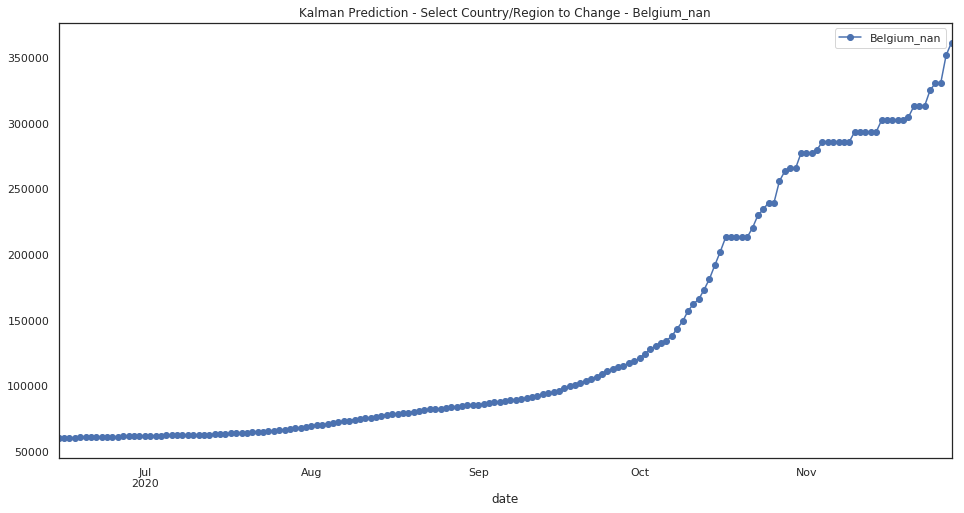

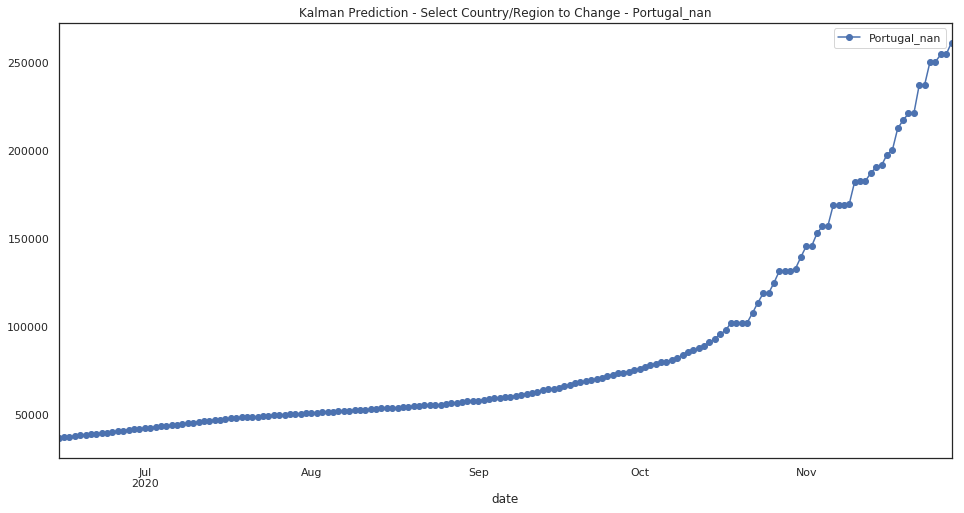

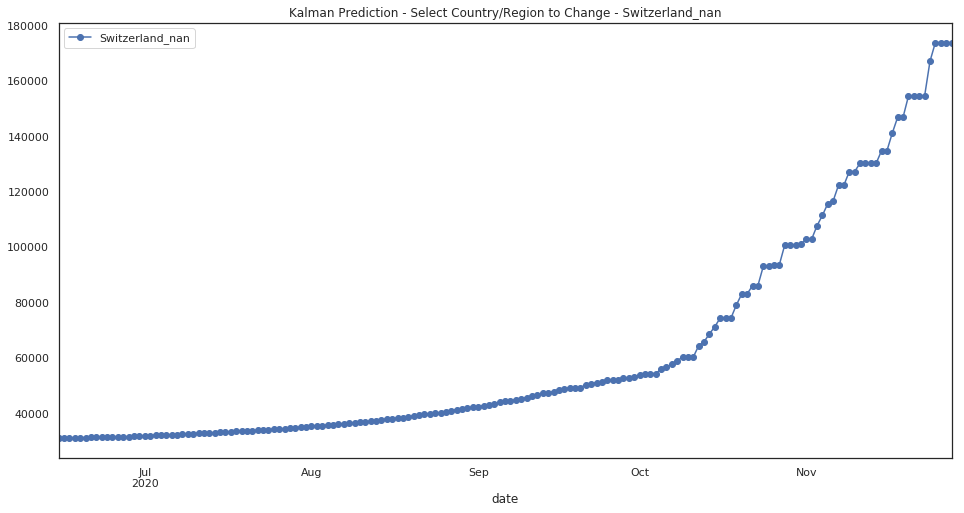

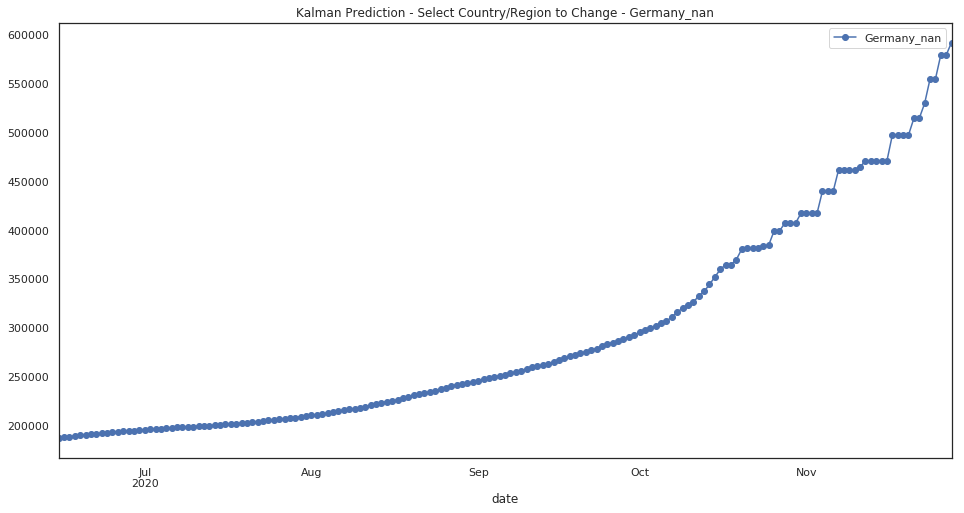

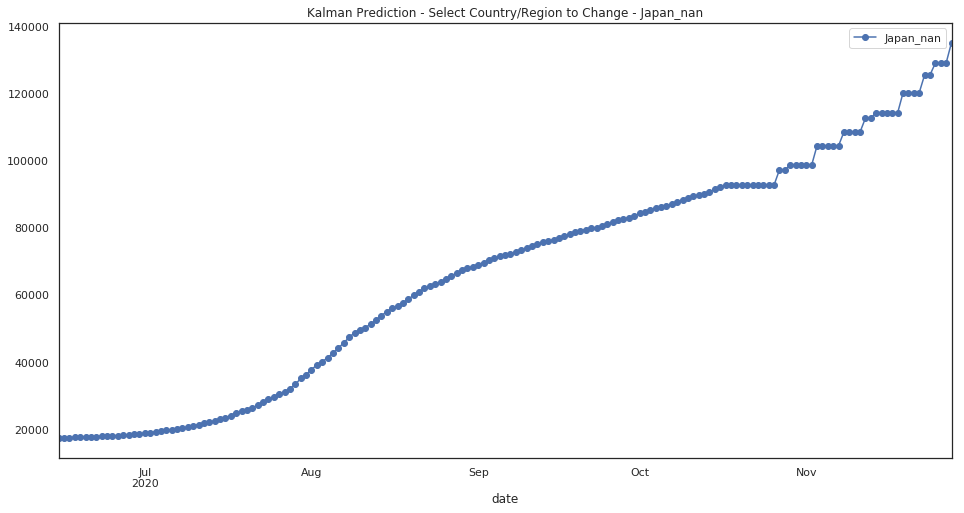

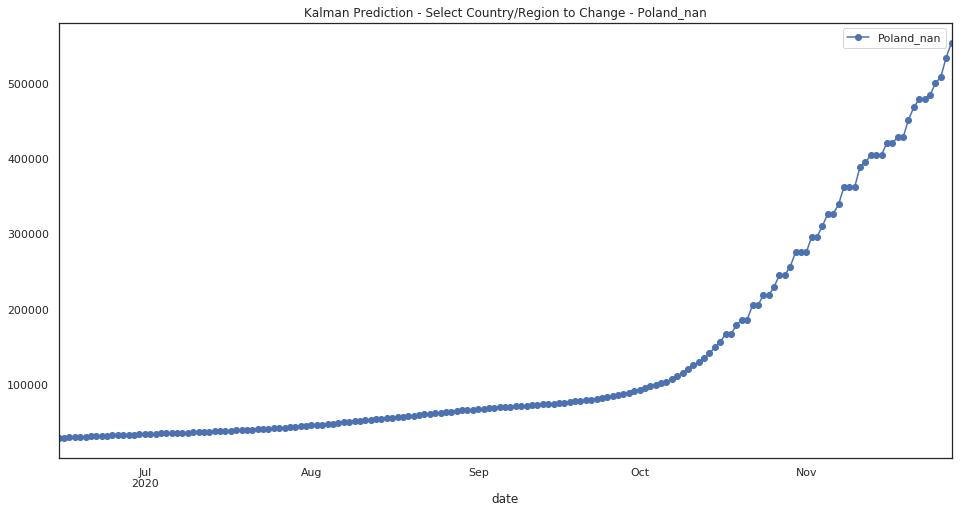

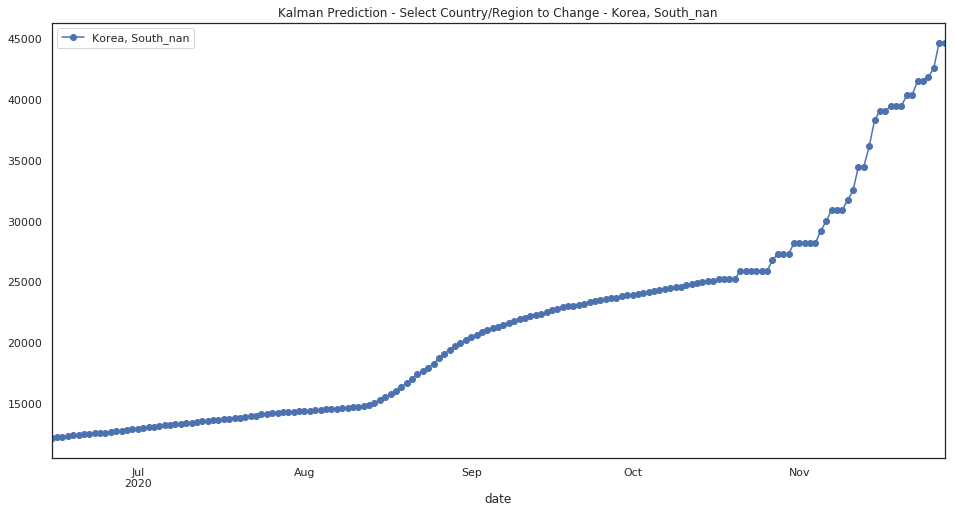

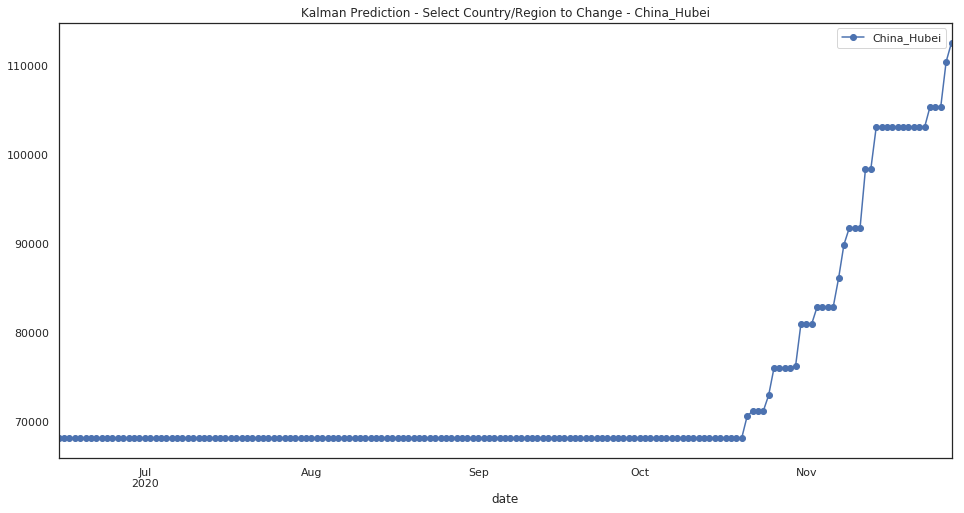

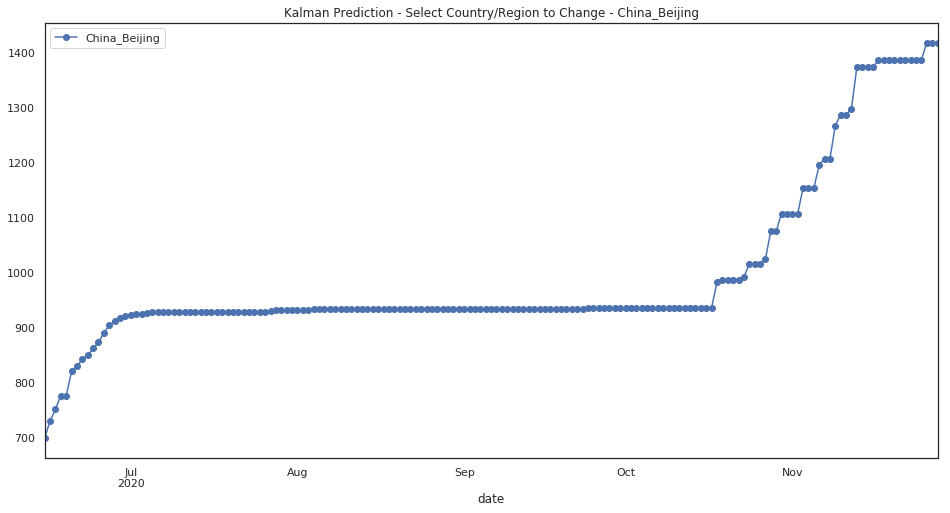

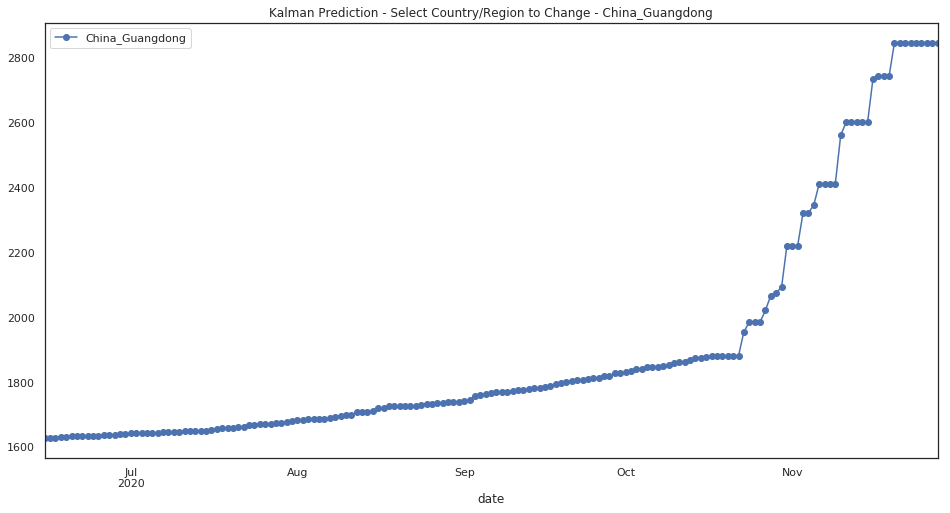

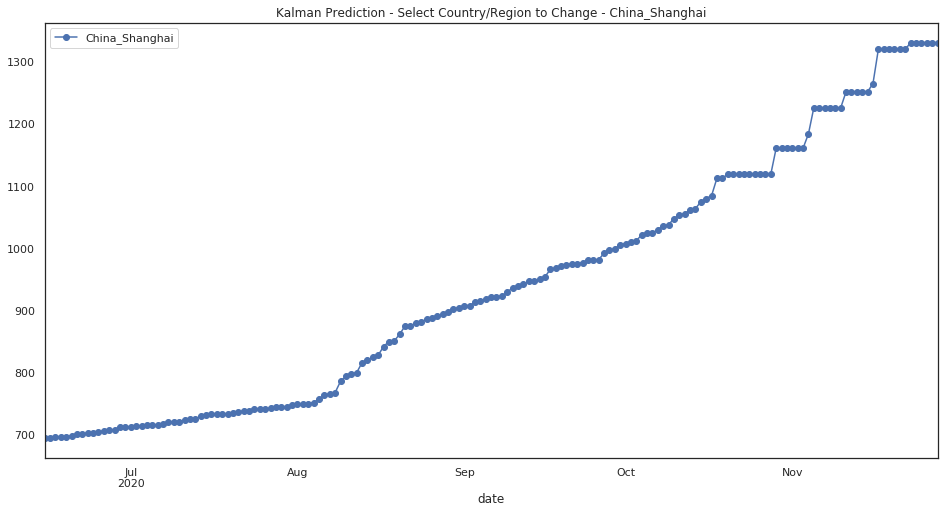

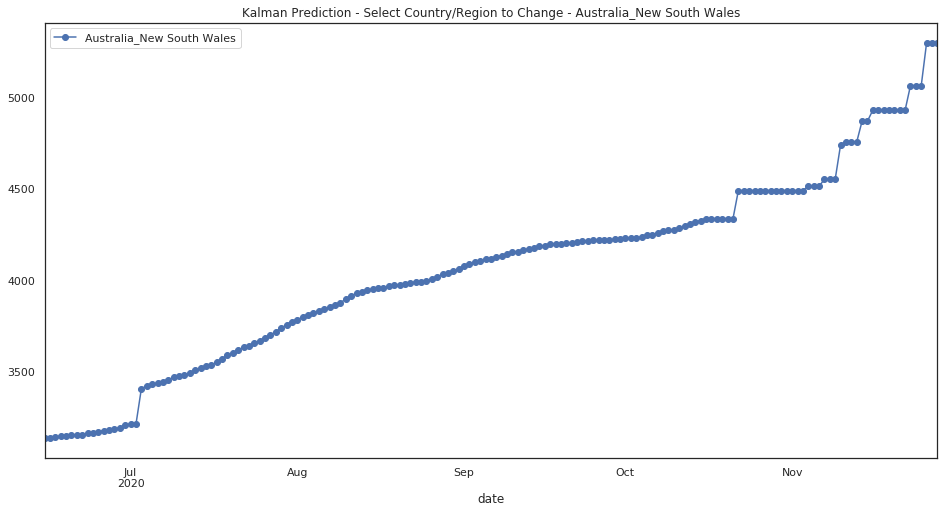

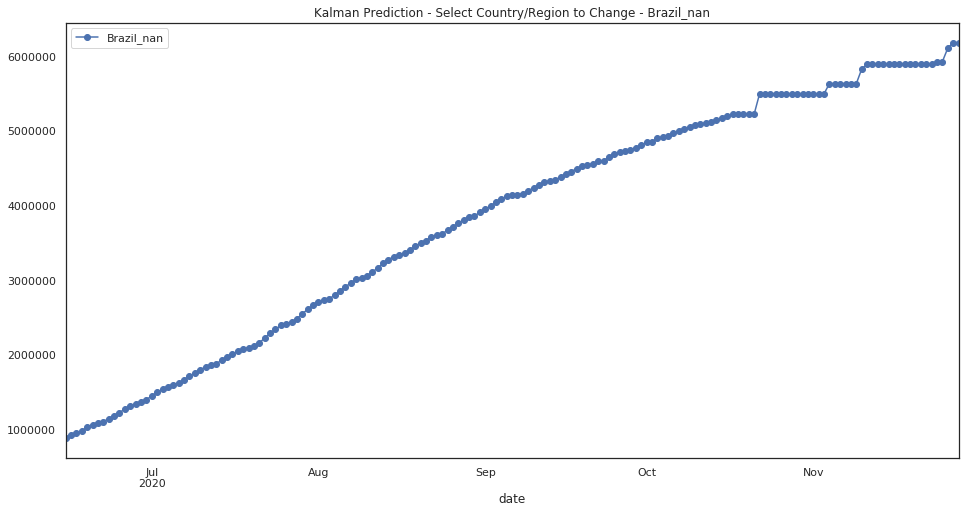

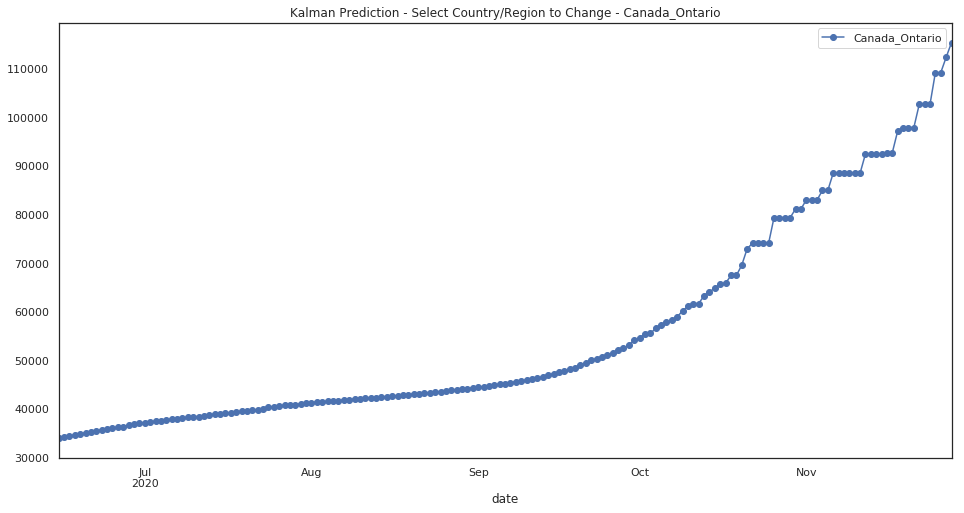

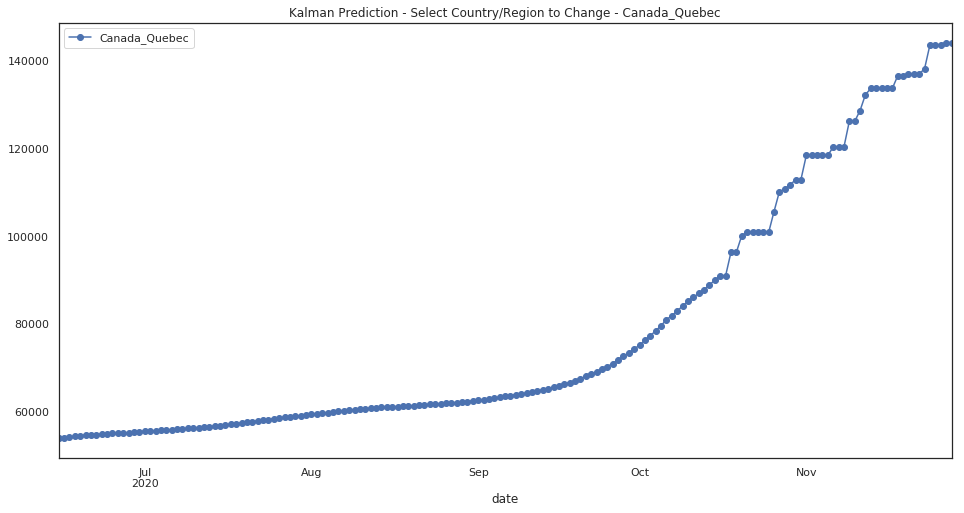

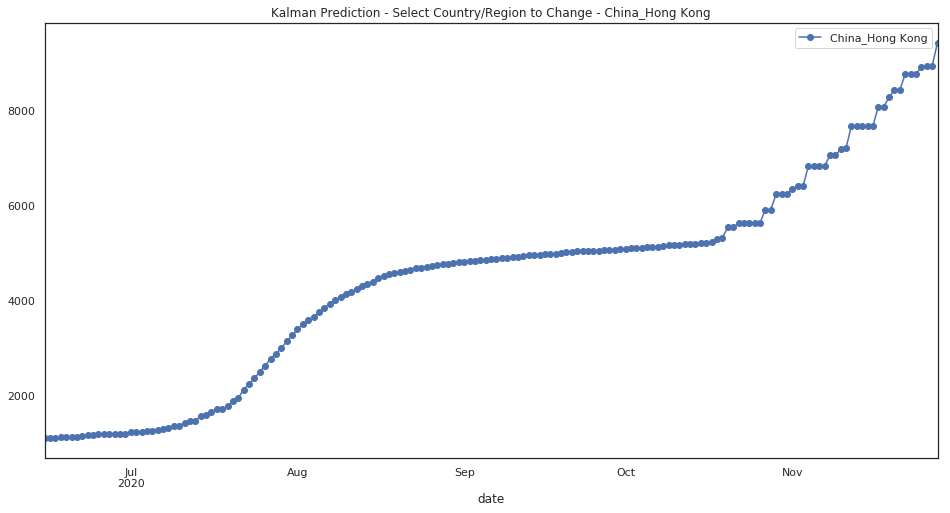

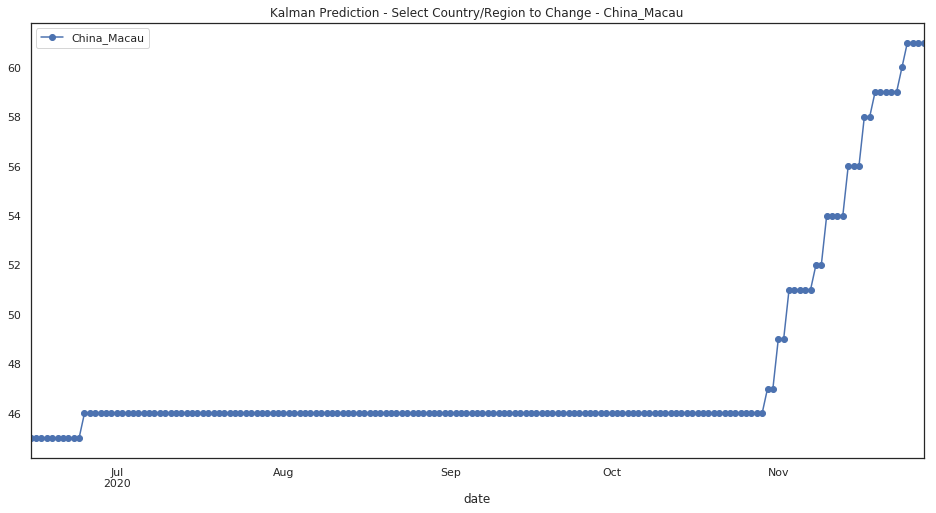

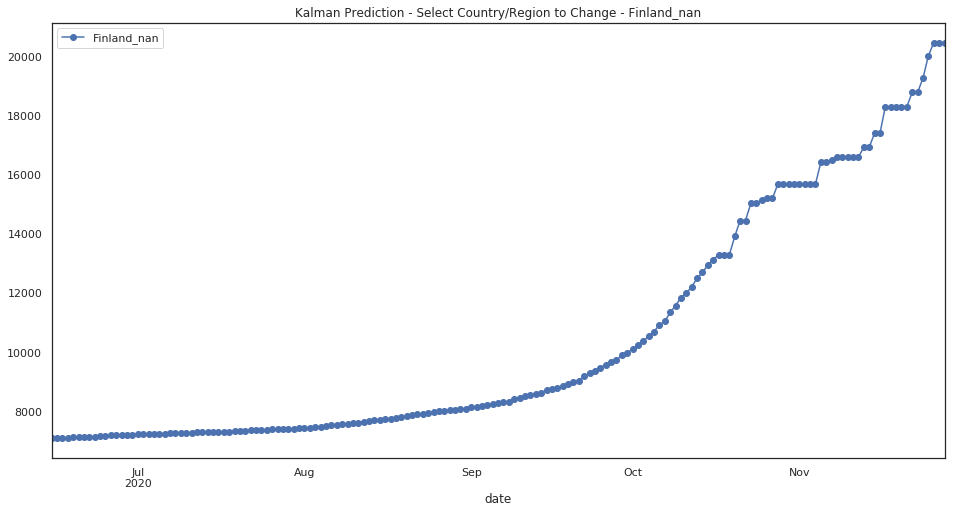

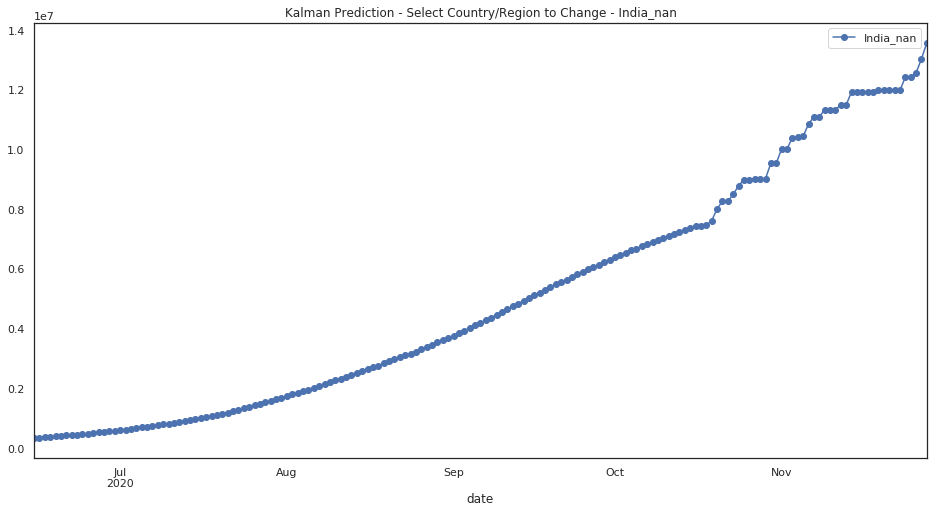

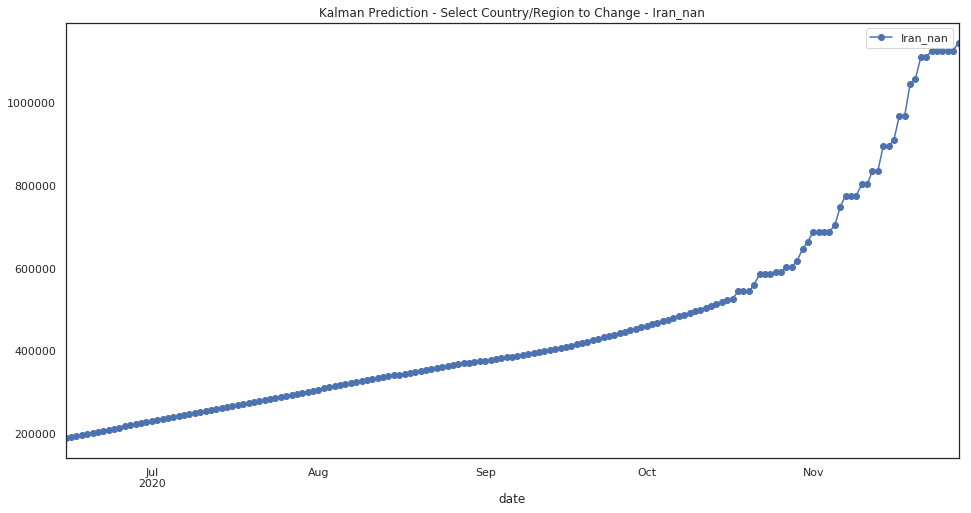

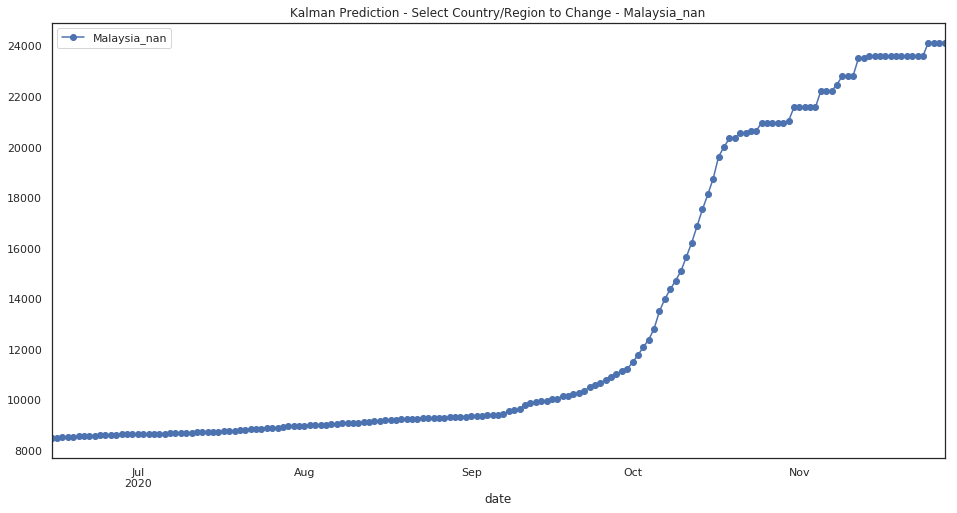

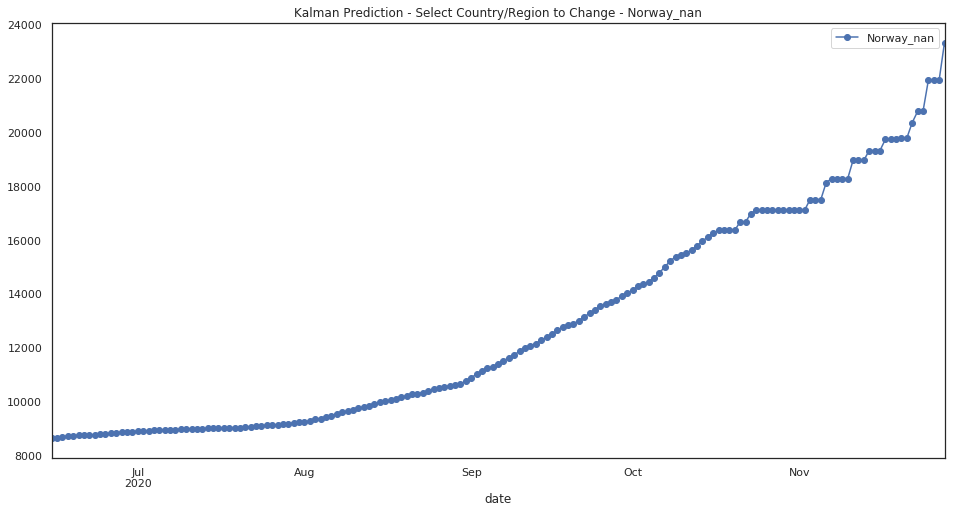

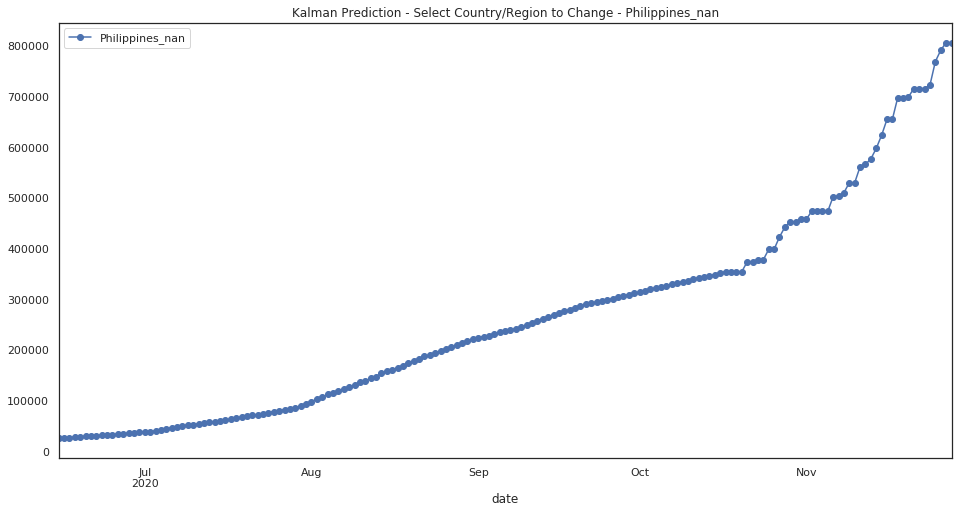

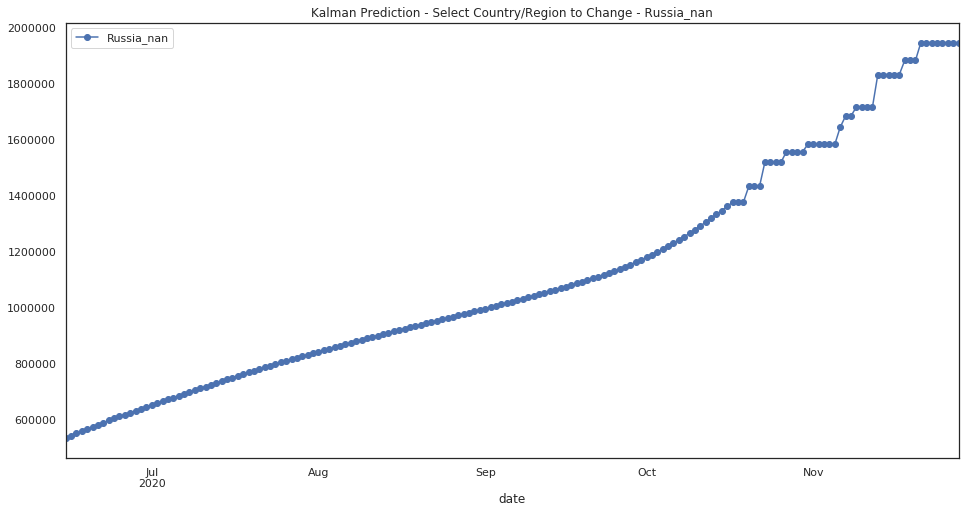

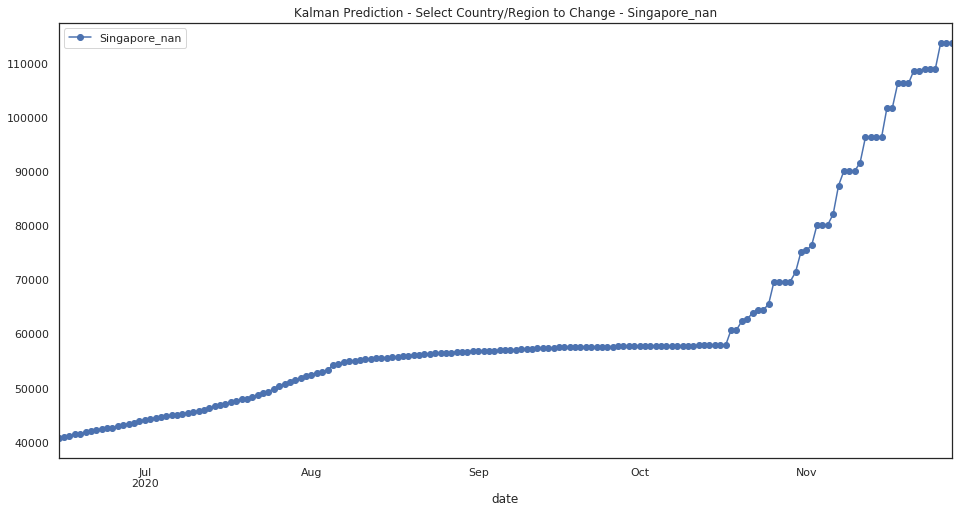

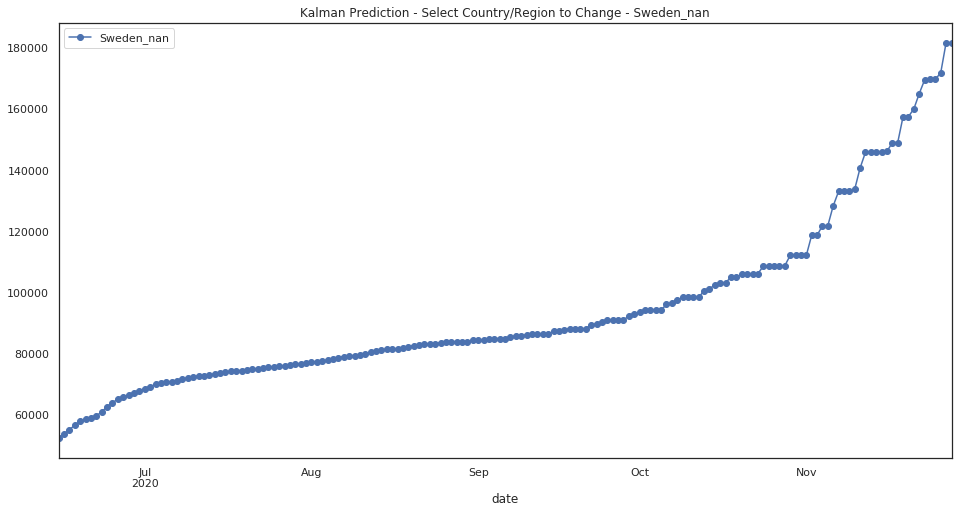

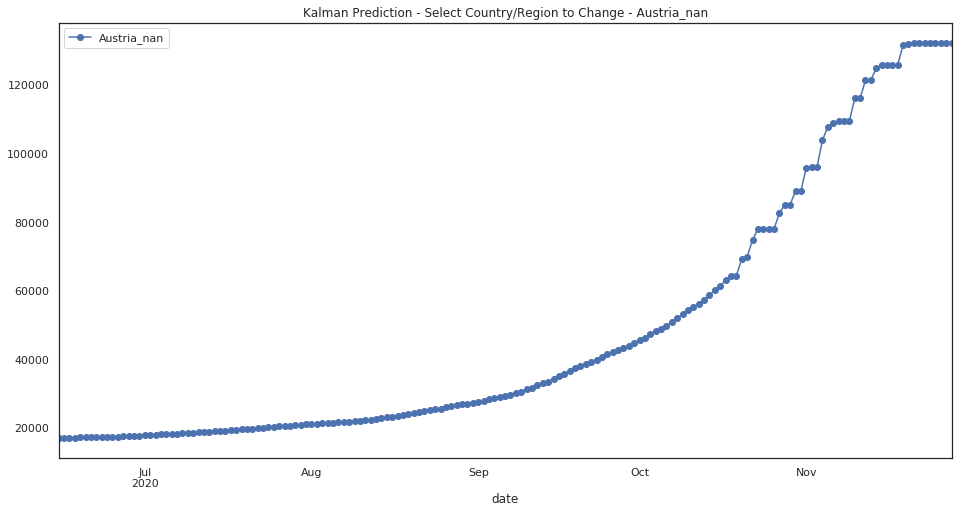

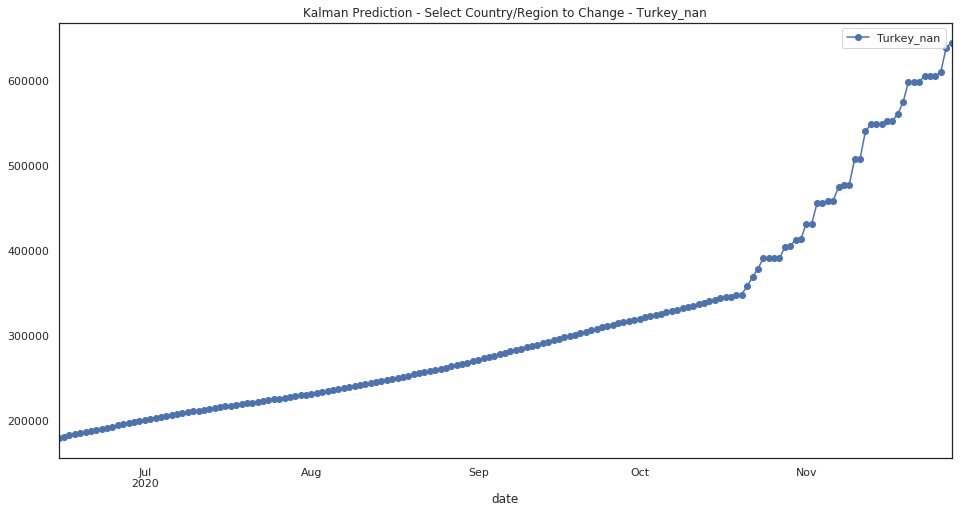

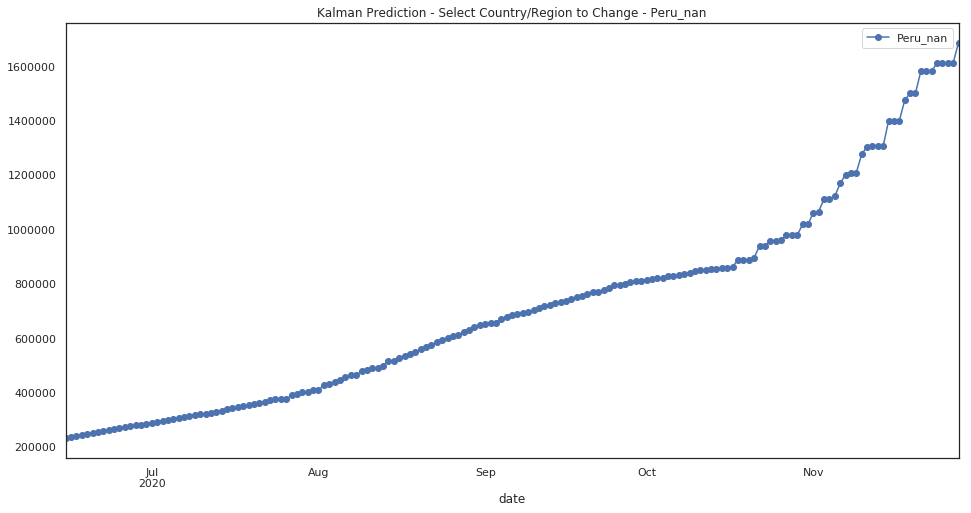

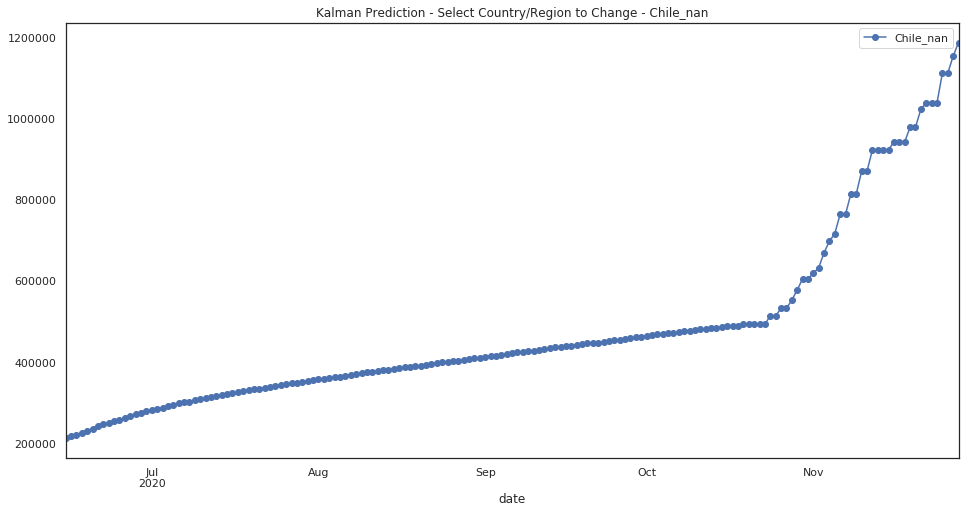

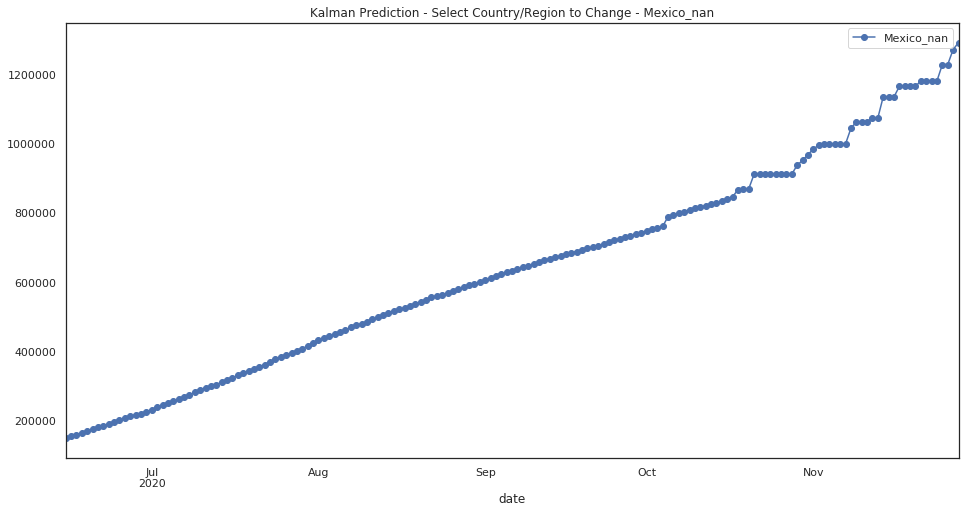

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-11-28 00:00:00
dtype: object


0  pred_confirmed
India_nan                                   NaN      13587095.0
United States_nan                           NaN      13072735.0
Brazil_nan                                  NaN       6183423.0
Spain_nan                                   NaN       2441395.0
Russia_nan                                  NaN       1944997.0
Peru_nan                                    NaN       1687013.0
United Kingdom_nan                          NaN       1656063.0
Argentina_nan                               NaN       1599485.0
Colombia_nan                                NaN       1524586.0
Mexico_nan                                  NaN       1292610.0
France_nan                                  NaN       1259252.0
Chile_nan                                   NaN       1187159.0
Iran_nan                                    NaN       1145643.0
Philippines_nan                             NaN        806455.0
South Africa_nan                            NaN        795988.0
Iraq_nan                                    NaN        772109.0
Italy_nan                                   NaN        769925.0
Turkey_nan                                  NaN        644792.0
Ukraine_nan                                 NaN        630816.0
Bangladesh_nan                              NaN        612435.0
Germany_nan                                 NaN        591646.0
Indonesia_nan                               NaN        578978.0
Poland_nan                                  NaN        553840.0
Pakistan_nan                                NaN        551755.0
Saudi Arabia_nan                            NaN        514820.0
Czechia_nan                                 NaN        475002.0
Israel_nan                                  NaN        444570.0
Netherlands_nan                             NaN        429064.0
Belgium_nan                                 NaN        361805.0
Morocco_nan                                 NaN        321992.0
...                                         ...             ...
Australia_Australian Capital Territory      NaN           144.0
France_Saint Barthelemy                     NaN           135.0
United Kingdom_British Virgin Islands       NaN           121.0
Canada_Prince Edward Island                 NaN           100.0
Saint Vincent and the Grenadines_nan        NaN            82.0
Holy See_nan                                NaN            67.0
China_Macau                                 NaN            61.0
Fiji_nan                                    NaN            55.0
Saint Lucia_nan                             NaN            48.0
Dominica_nan                                NaN            48.0
Timor-Leste_nan                             NaN            48.0
Grenada_nan                                 NaN            43.0
Laos_nan                                    NaN            43.0
Australia_Northern Territory                NaN            42.0
France_New Caledonia                        NaN            37.0
China_Qinghai                               NaN            33.0
Saint Kitts and Nevis_nan                   NaN            27.0
Canada_Yukon                                NaN            22.0
United Kingdom_Falkland Islands (Malvinas)  NaN            22.0
Canada_Grand Princess                       NaN            20.0
Denmark_Greenland                           NaN            20.0
France_Saint Pierre and Miquelon            NaN            17.0
United Kingdom_Montserrat                   NaN            16.0
Western Sahara_nan                          NaN            10.0
MS Zaandam_nan                              NaN             9.0
Canada_Northwest Territories                NaN             5.0
Solomon Islands_nan                         NaN             4.0
United Kingdom_Anguilla                     NaN             3.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[267 rows x 2 columns]

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-06-15          31782.0      11154.0      19290.0      10519.0   
2020-06-16          32456.0      11225.0      19390.0      10520.0   
2020-06-17          26310.0       1672.0      11147.0        854.0   
2020-06-18          26874.0       1722.0      11268.0        854.0   
2020-06-19          27642.0       1788.0      11385.0        855.0   
2020-06-20          28107.0       1838.0      11504.0        855.0   
2020-06-21          28587.0       1891.0      11631.0        855.0   
2020-06-22          28901.0       1962.0      11771.0        855.0   
2020-06-23          29502.0       2121.0      12120.0       1031.0   
2020-06-24          29702.0       2088.0      12289.0       1031.0   
2020-06-25          30159.0       2114.0      12479.0       1031.0   
2020-06-26          30567.0       2192.0      12708.0       1031.0   
2020-06-27          30680.0       2269.0      12976.0       1031.0   
2020-06-28          30981.0       2381.0      13270.0       1031.0   
2020-06-29          31326.0       2404.0      13566.0       1031.0   
2020-06-30          31582.0       2512.0      13901.0       1031.0   
2020-07-01          31894.0       2549.0      14258.0       1031.0   
2020-07-02          32109.0       2708.0      14639.0       1031.0   
2020-07-03          32367.0       2671.0      15048.0       1031.0   
2020-07-04          32742.0       2752.0      15476.0       1031.0   
2020-07-05          33040.0       2886.0      15917.0       1031.0   
2020-07-06          33261.0       2937.0      16380.0       1031.0   
2020-07-07          33452.0       3021.0      16855.0       1031.0   
2020-07-08          33655.0       3086.0      17328.0       1031.0   
2020-07-09          33966.0       3189.0      17792.0       1031.0   
2020-07-10          34282.0       3242.0      18233.0       1031.0   
2020-07-11          34458.0       3319.0      18702.0       1031.0   
2020-07-12          34524.0       3407.0      19187.0       1031.0   
2020-07-13          34526.0       3551.0      19683.0       1033.0   
2020-07-14          34764.0       3577.0      20207.0       1004.0   
...                     ...          ...          ...          ...   
2020-10-31          51473.0      21283.0      60901.0       4748.0   
2020-11-01          50574.0      21230.0      60759.0       4680.0   
2020-11-02          50964.0      22496.0      62792.0       4743.0   
2020-11-03          54060.0      22825.0      65142.0       4755.0   
2020-11-04          55313.0      23689.0      64715.0       4949.0   
2020-11-05          54285.0      24880.0      64344.0       4607.0   
2020-11-06          55380.0      25020.0      64344.0       5238.0   
2020-11-07          56387.0      24831.0      64344.0       4893.0   
2020-11-08          55837.0      24879.0      65138.0       5345.0   
2020-11-09          55837.0      24921.0      68215.0       5502.0   
2020-11-10          57516.0      24975.0      69422.0       5249.0   
2020-11-11          58586.0      24986.0      68279.0       5785.0   
2020-11-12          57814.0      24998.0      68279.0       5589.0   
2020-11-13          57814.0      25017.0      68497.0       5801.0   
2020-11-14          59391.0      26130.0      68449.0       5885.0   
2020-11-15          61879.0      26500.0      68449.0       5754.0   
2020-11-16          62016.0      26231.0      68451.0       6213.0   
2020-11-17          61942.0      26231.0      68963.0       5833.0   
2020-11-18          62555.0      26458.0      71845.0       6298.0   
2020-11-19          63572.0      27735.0      73227.0       6291.0   
2020-11-20          66053.0      28762.0      71983.0       6387.0   
2020-11-21          69071.0      28677.0      71983.0       6266.0   
2020-11-22          69834.0      28521.0      71983.0       6701.0   
2020-11-23          68904.0      28582.0      71983.0       6408.0   
2020-11-24

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['India_nan',
 'United States_nan',
 'Brazil_nan',
 'Spain_nan',
 'Russia_nan',
 'Peru_nan',
 'United Kingdom_nan',
 'Argentina_nan',
 'Colombia_nan',
 'Mexico_nan',
 'France_nan',
 'Chile_nan',
 'Iran_nan',
 'Philippines_nan',
 'South Africa_nan',
 'Iraq_nan',
 'Italy_nan',
 'Turkey_nan',
 'Ukraine_nan',
 'Bangladesh_nan',
 'Germany_nan',
 'Indonesia_nan',
 'Poland_nan',
 'Pakistan_nan',
 'Saudi Arabia_nan',
 'Czechia_nan',
 'Israel_nan',
 'Netherlands_nan',
 'Belgium_nan',
 'Morocco_nan',
 'Romania_nan',
 'Guatemala_nan',
 'Portugal_nan',
 'Kuwait_nan',
 'Nepal_nan',
 'Qatar_nan',
 'Panama_nan',
 'United Arab Emirates_nan',
 'Dominican Republic_nan',
 'Ecuador_nan',
 'Egypt_nan',
 'Sweden_nan',
 'Switzerland_nan',
 'Bolivia_nan',
 'Costa Rica_nan',
 'Ethiopia_nan',
 'Belarus_nan',
 'Kazakhstan_nan',
 'Oman_nan',
 'Lebanon_nan',
 'Canada_Quebec',
 'Japan_nan',
 'Armenia_nan',
 'Austria_nan',
 'Moldova_nan',
 'Honduras_nan',
 'Canada_Ontario',
 'Singapore_nan',
 'China_Hubei',
 'Nigeri

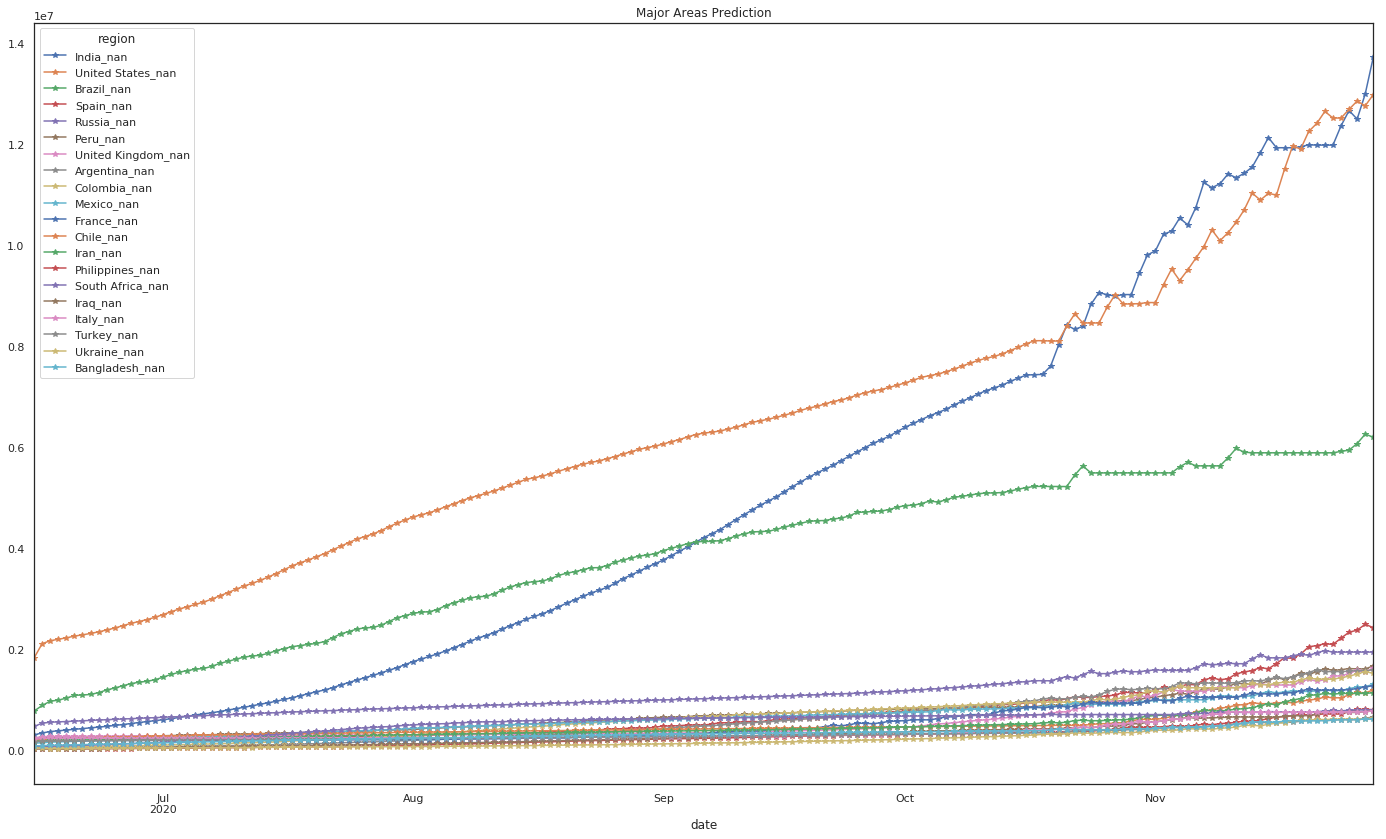

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

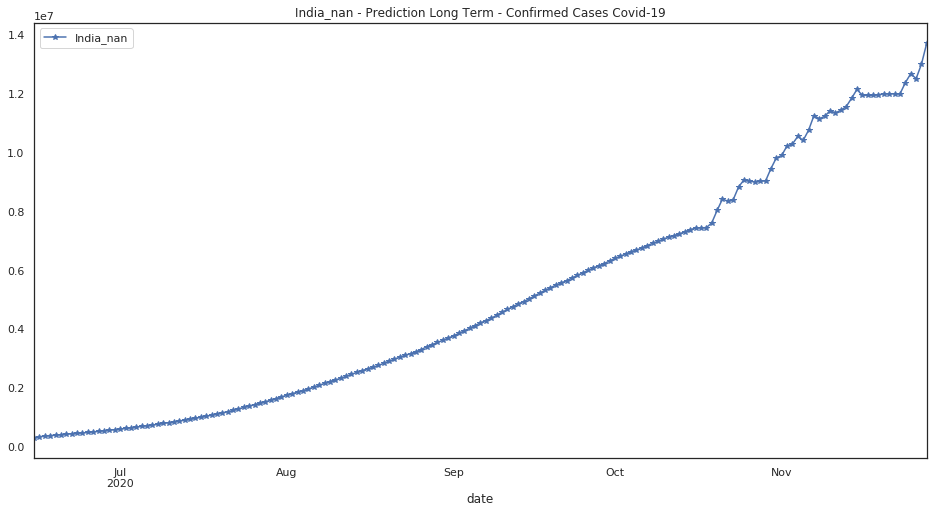

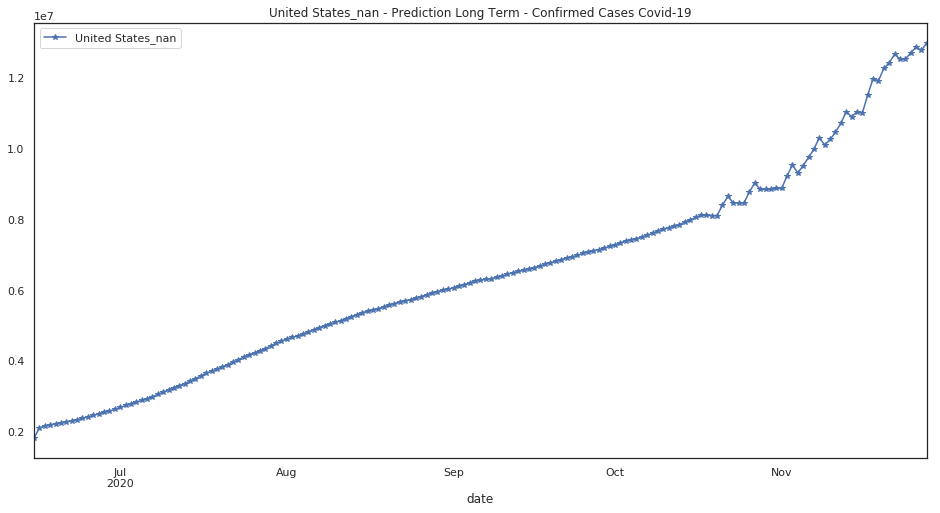

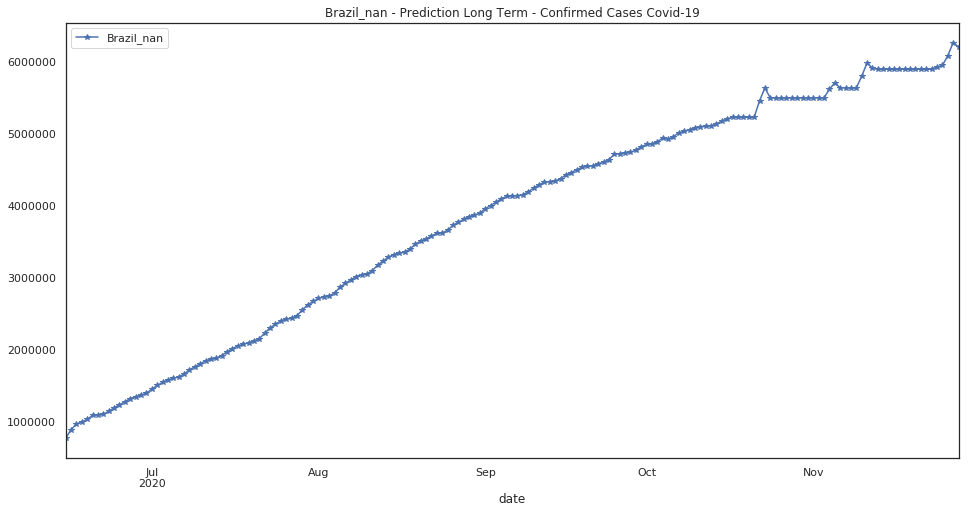

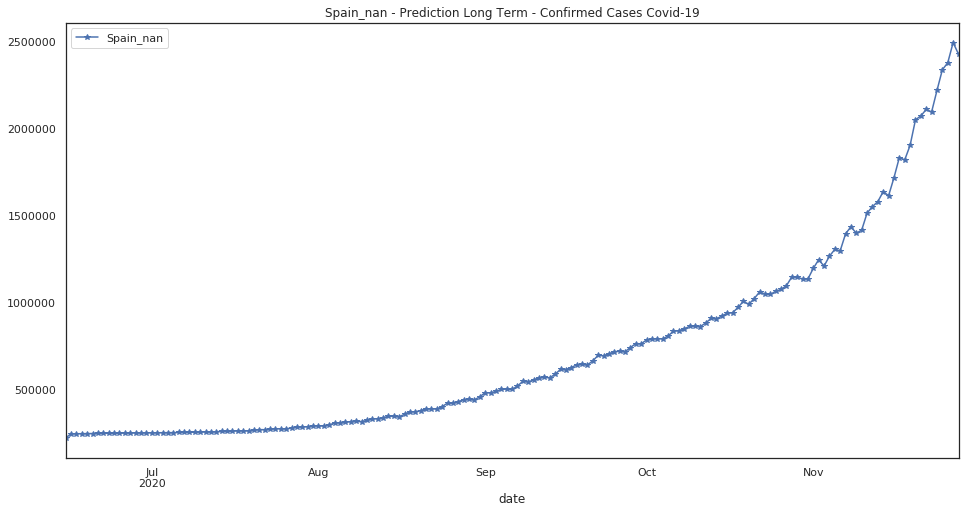

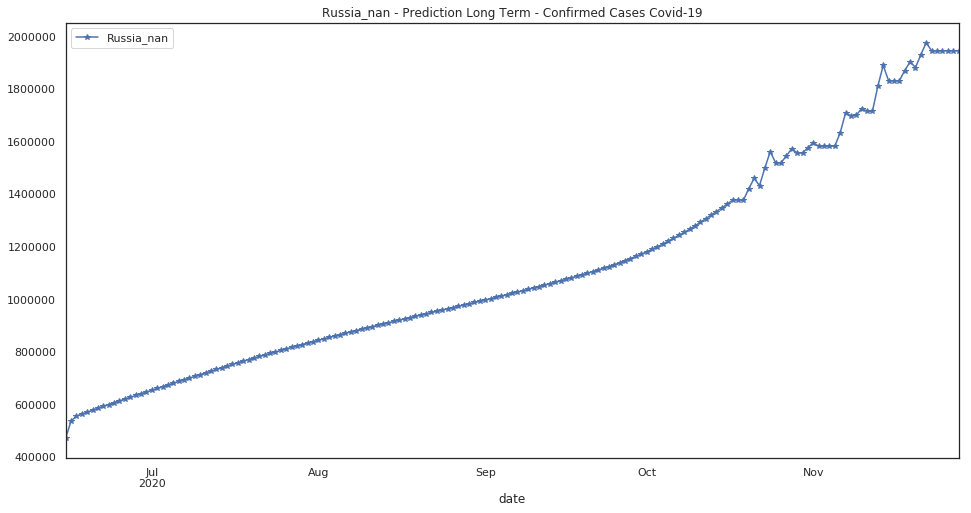

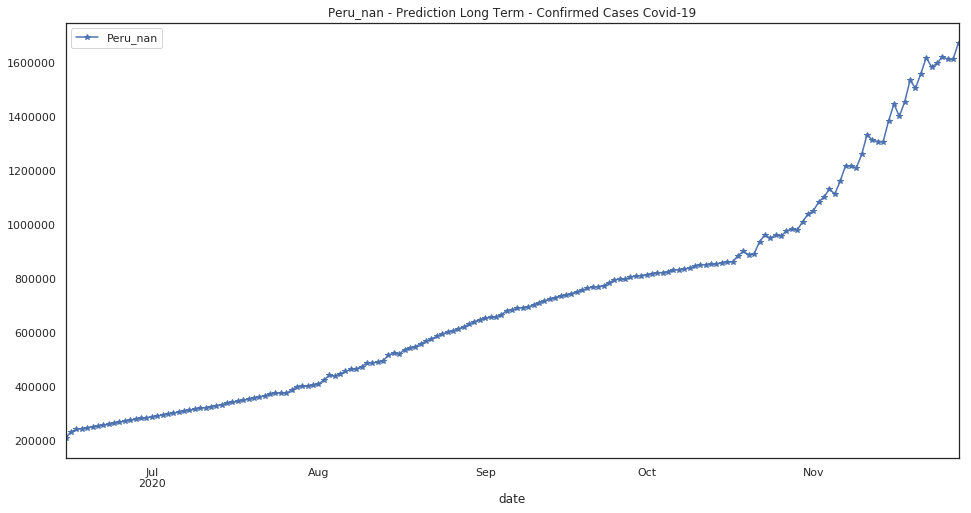

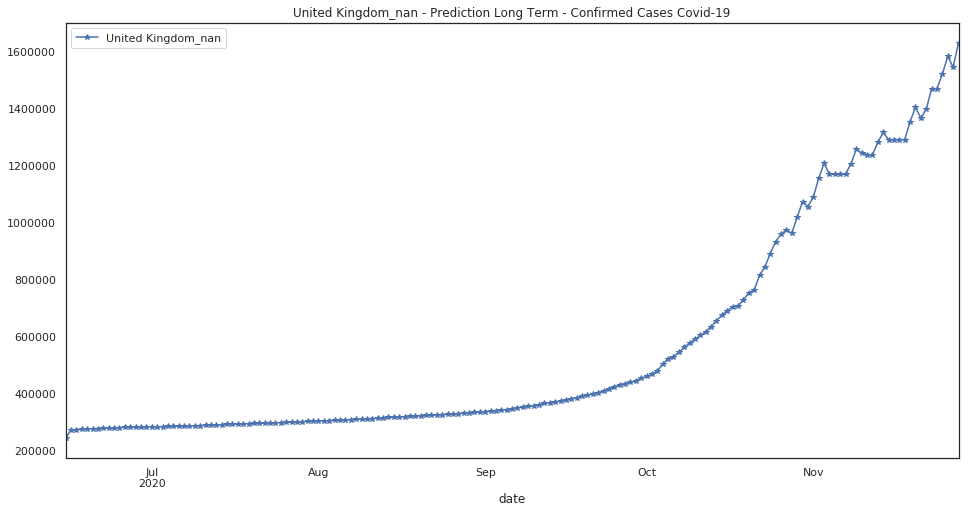

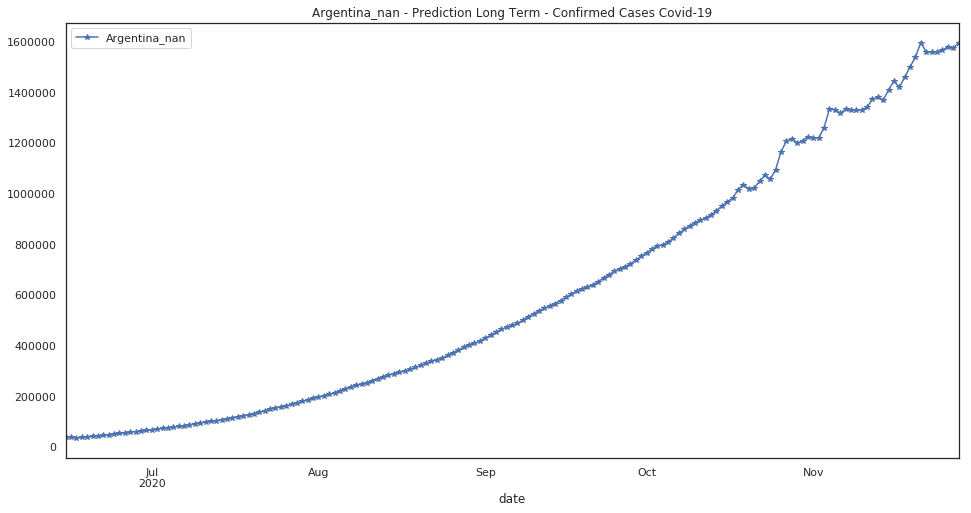

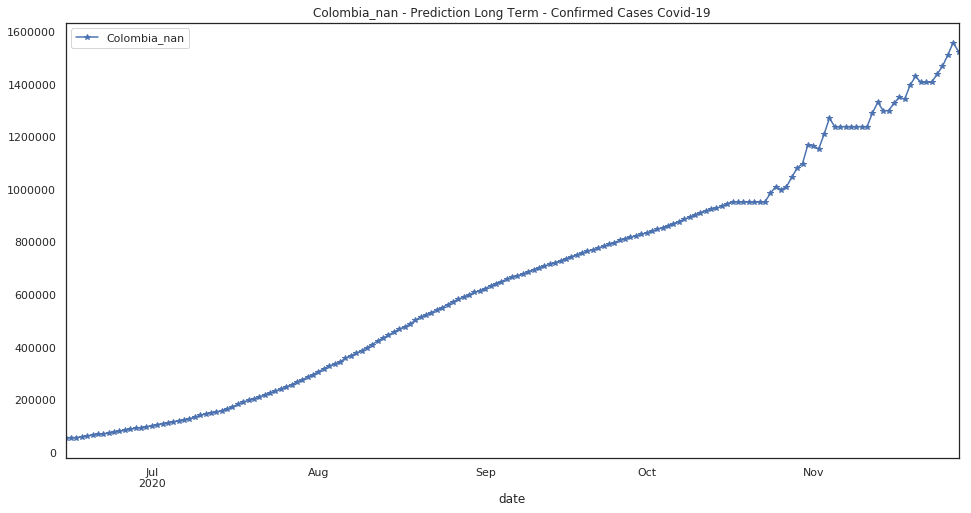

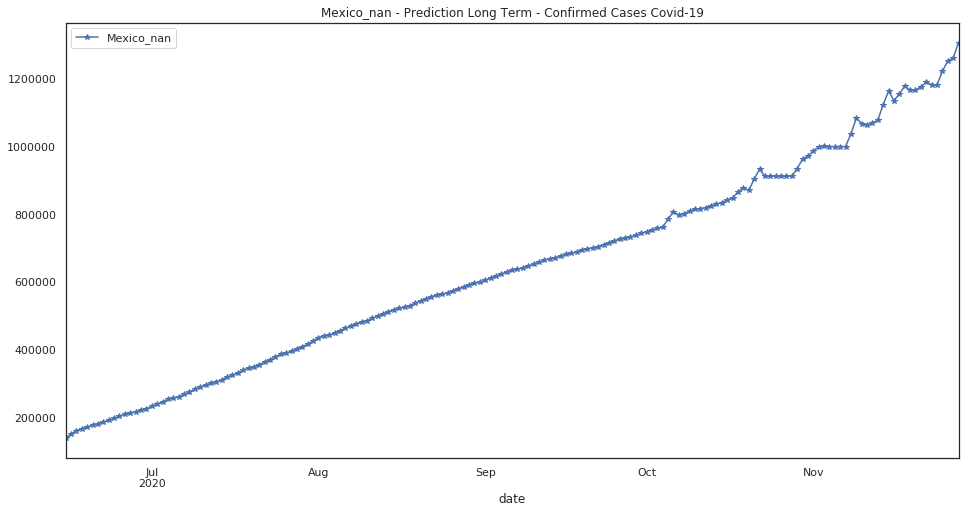

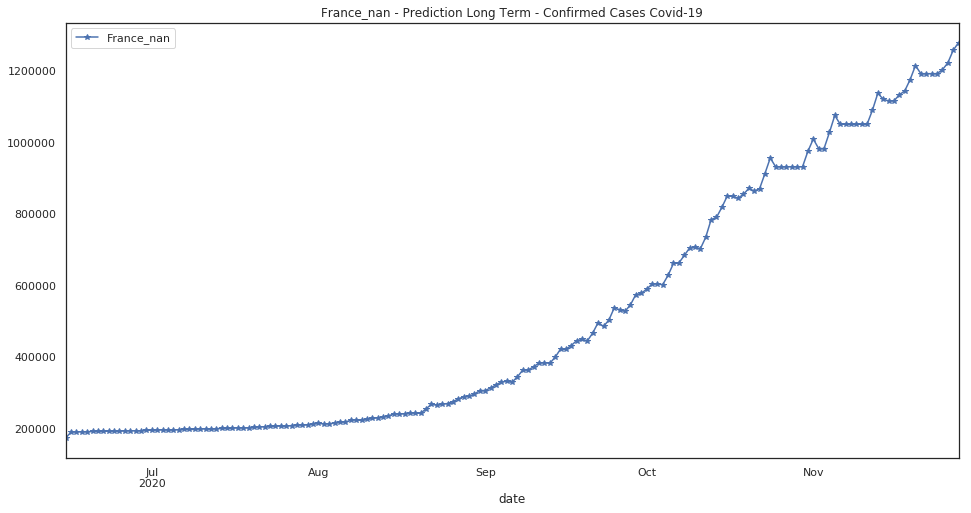

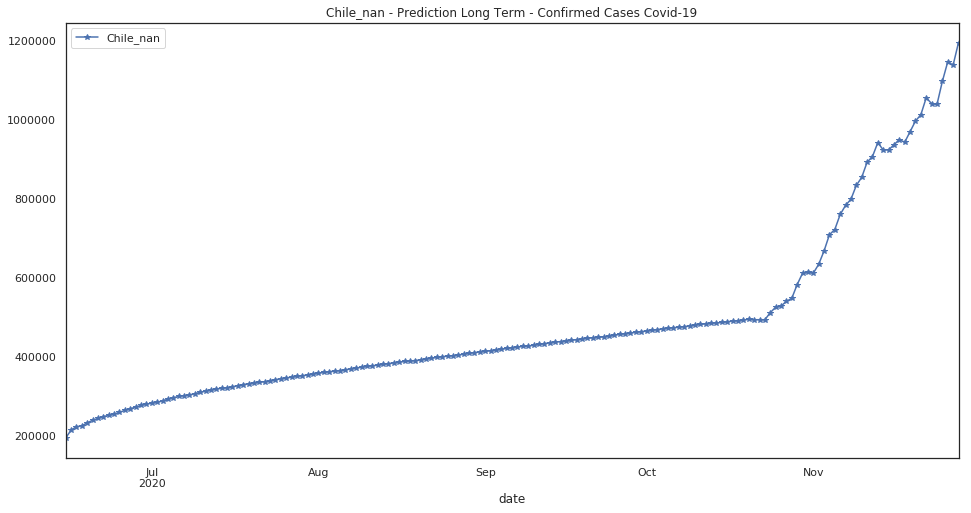

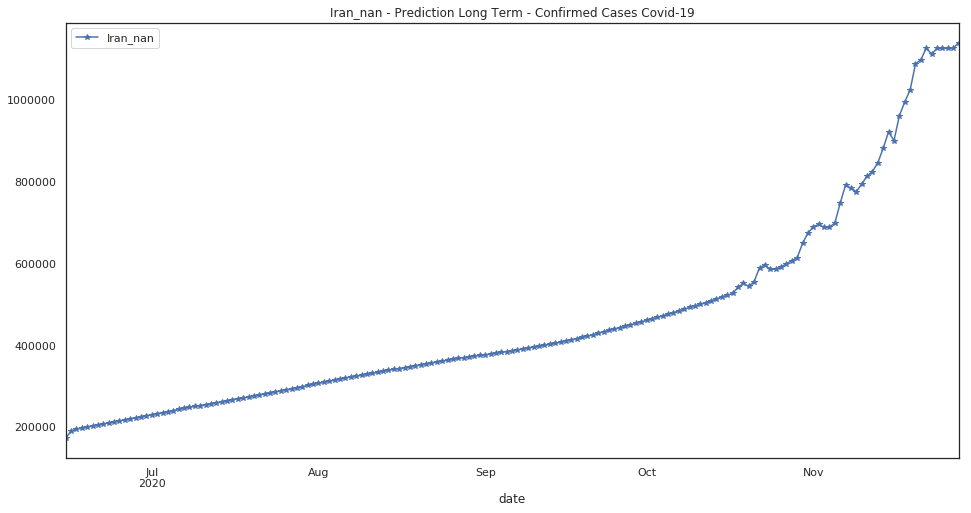

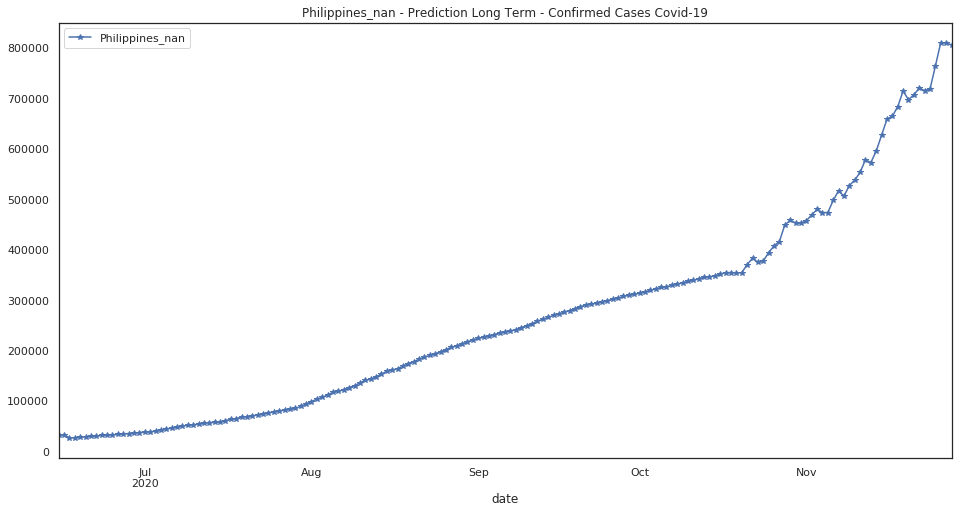

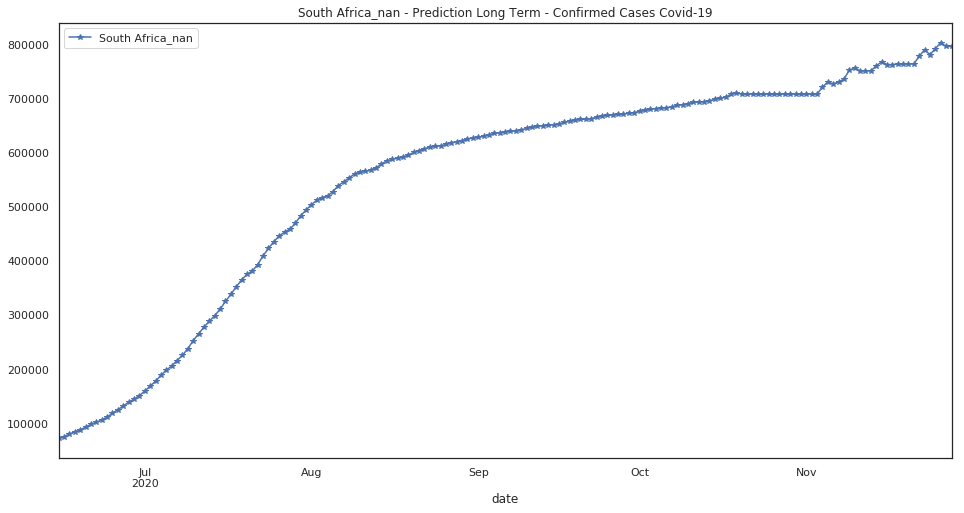

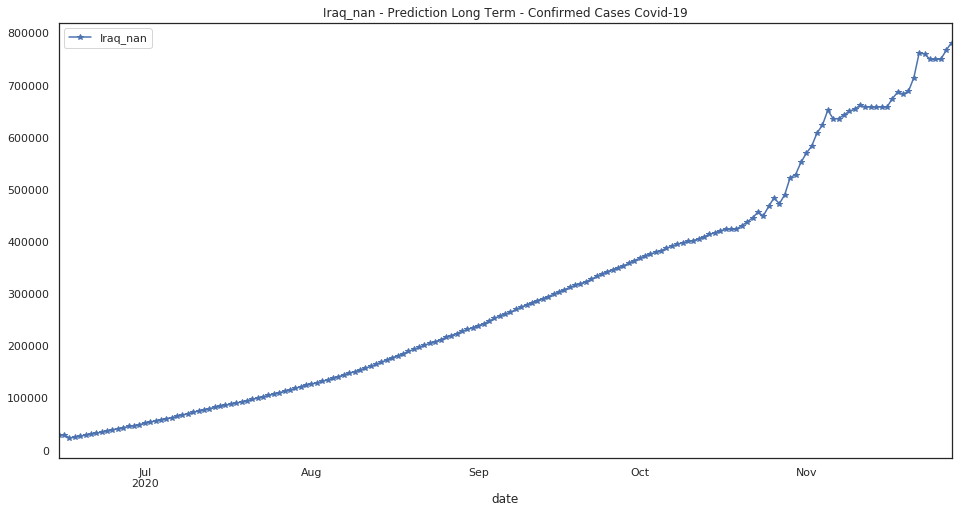

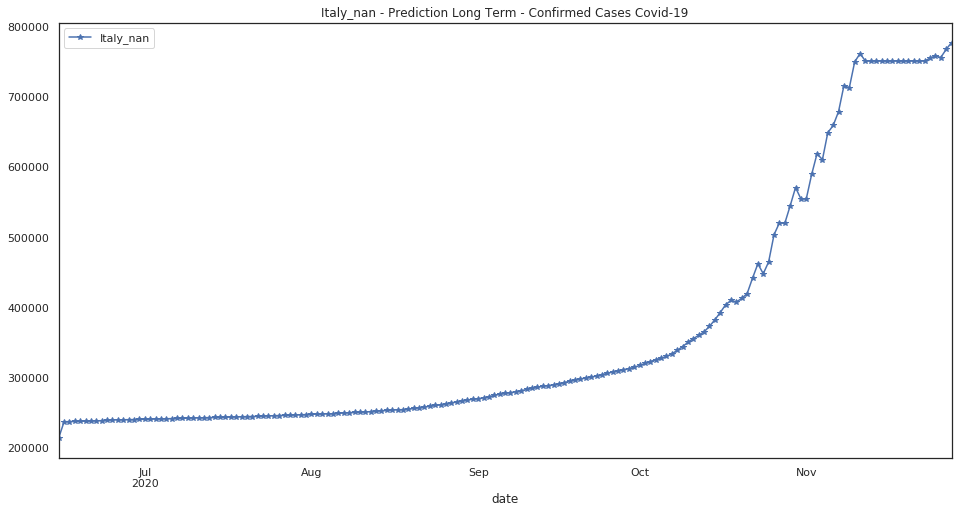

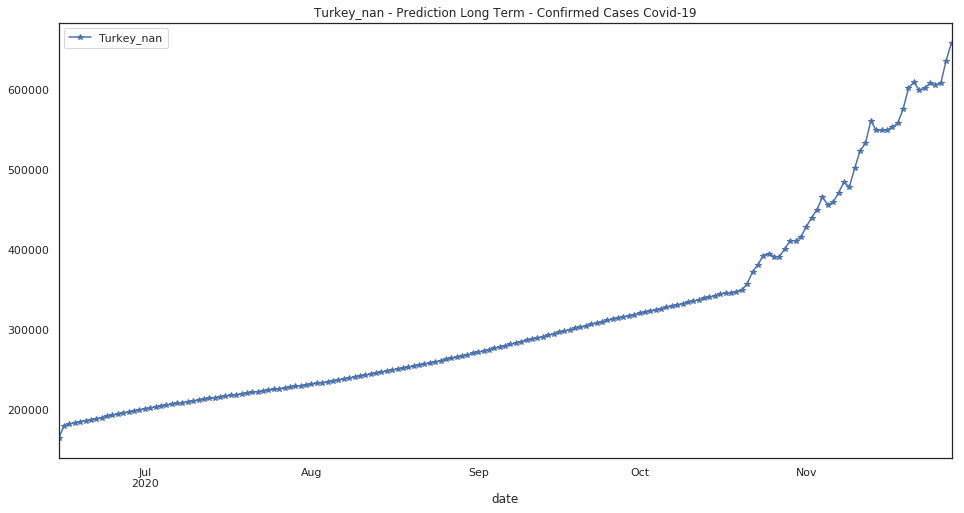

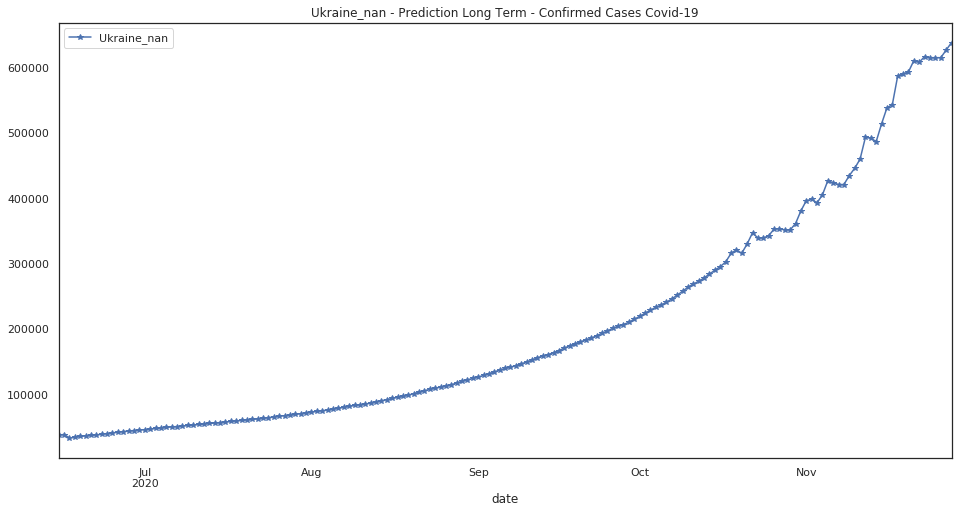

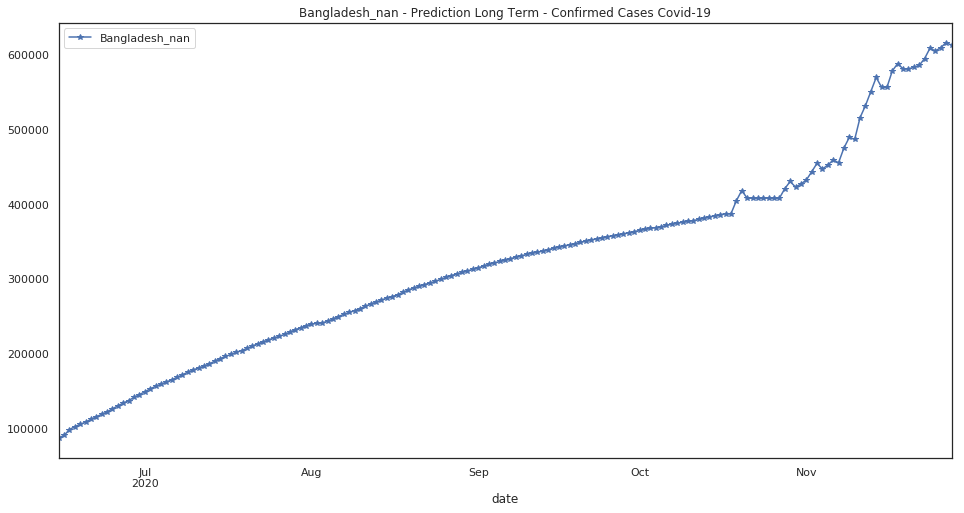

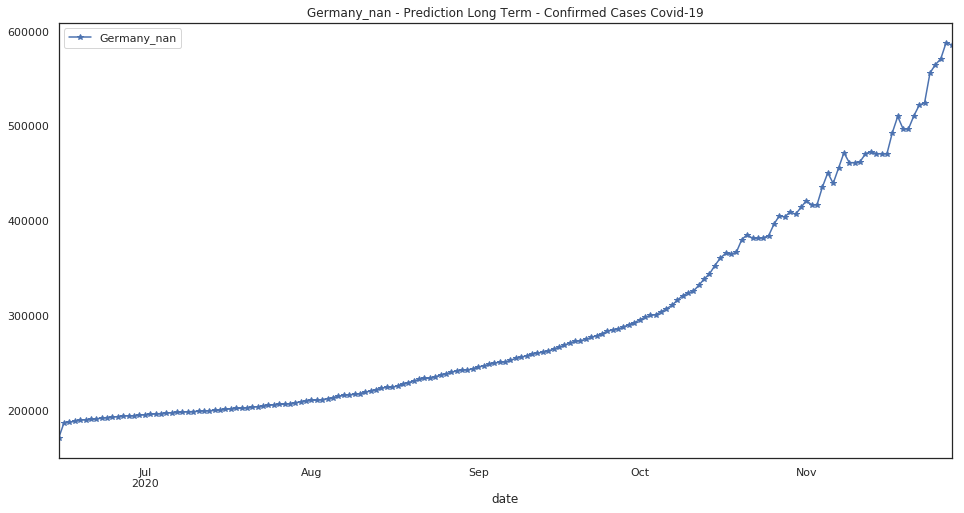

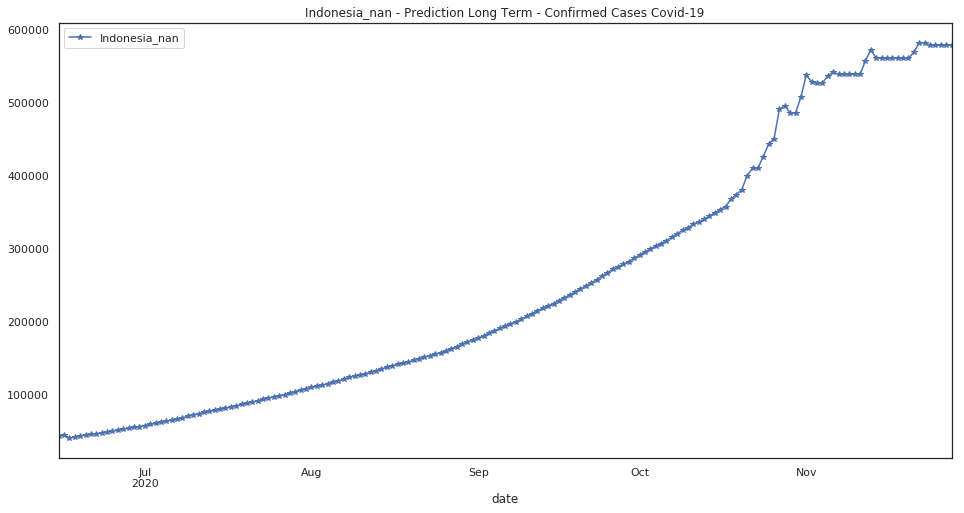

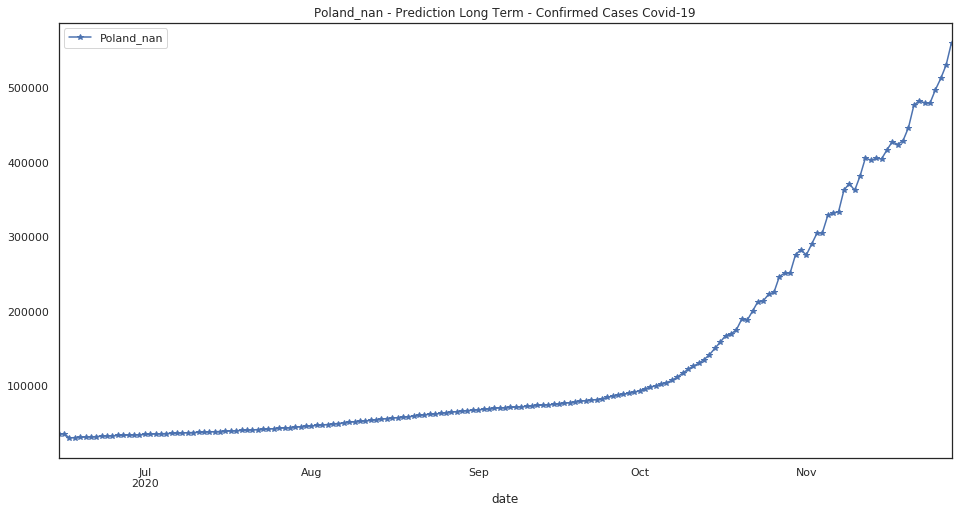

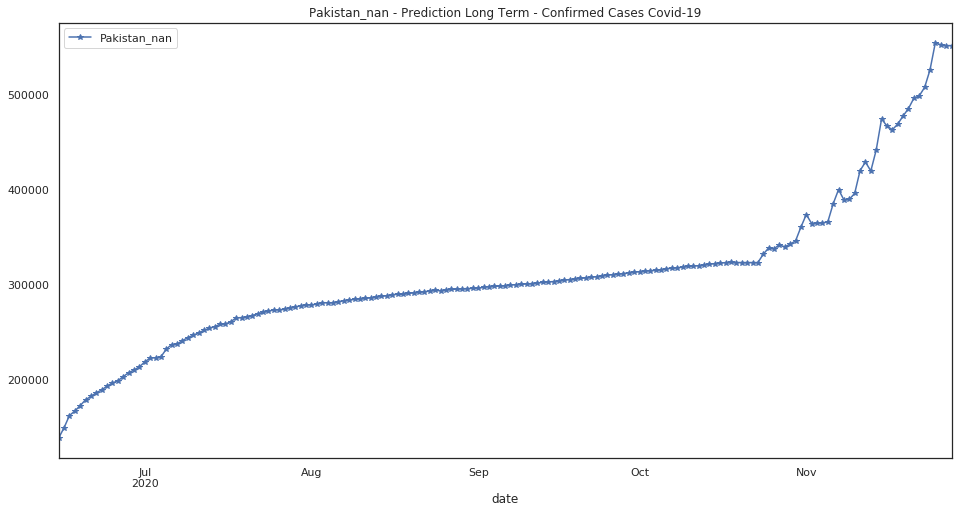

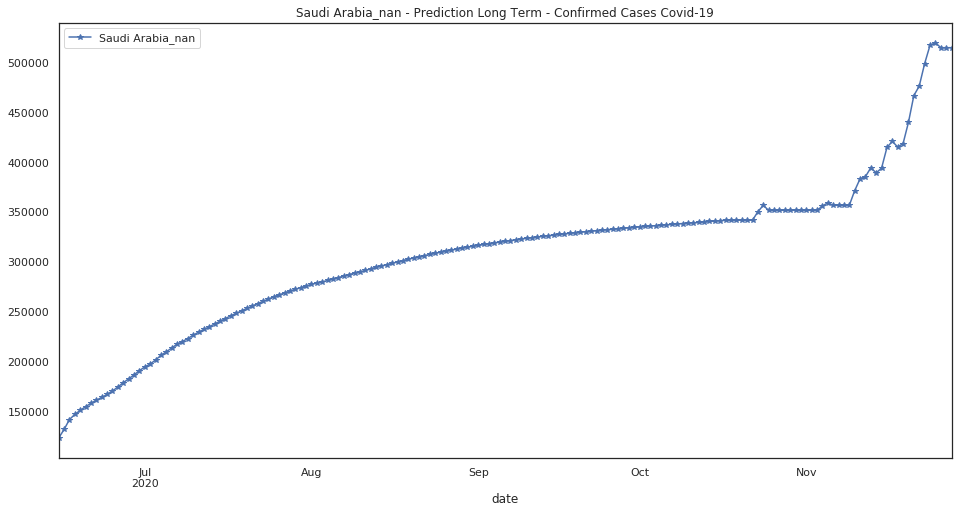

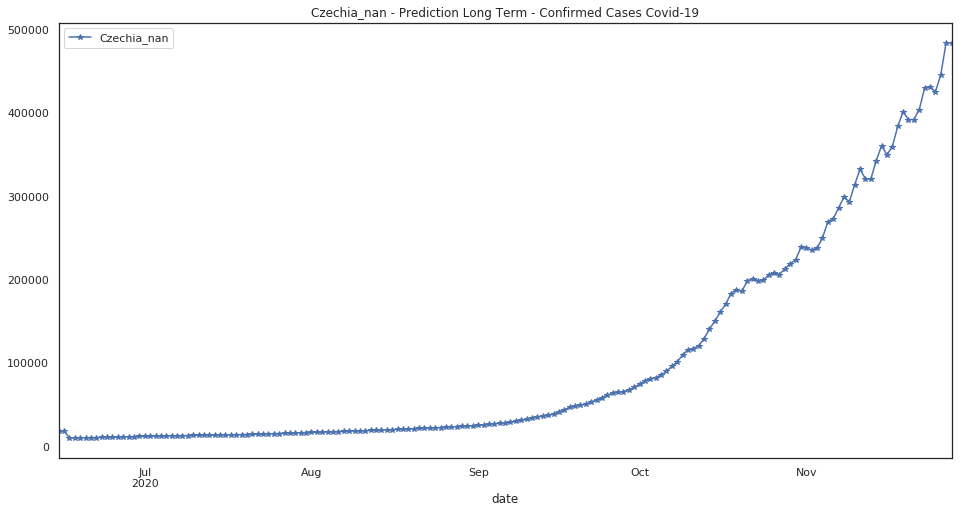

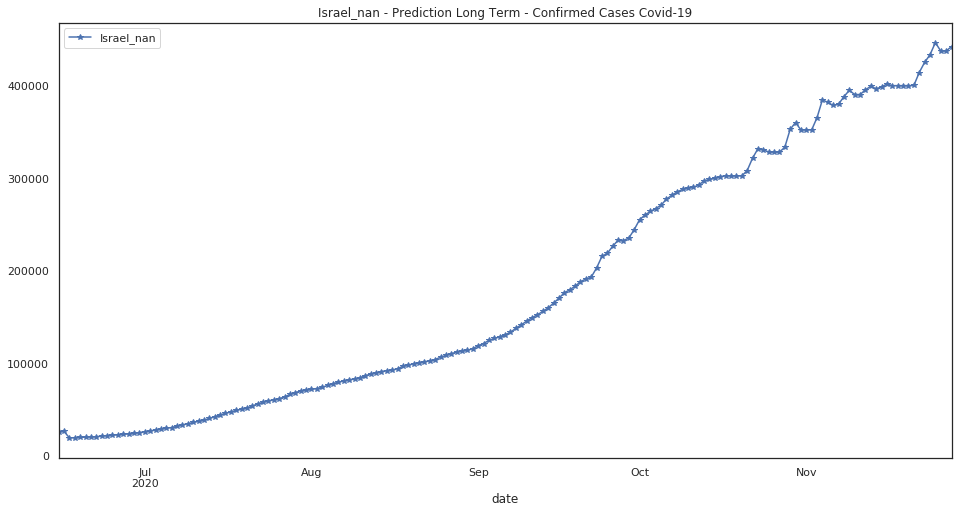

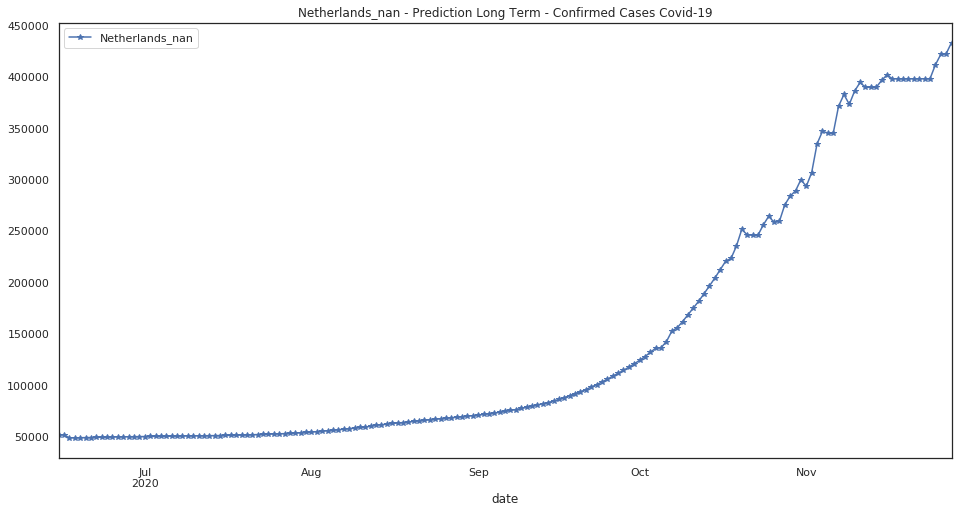

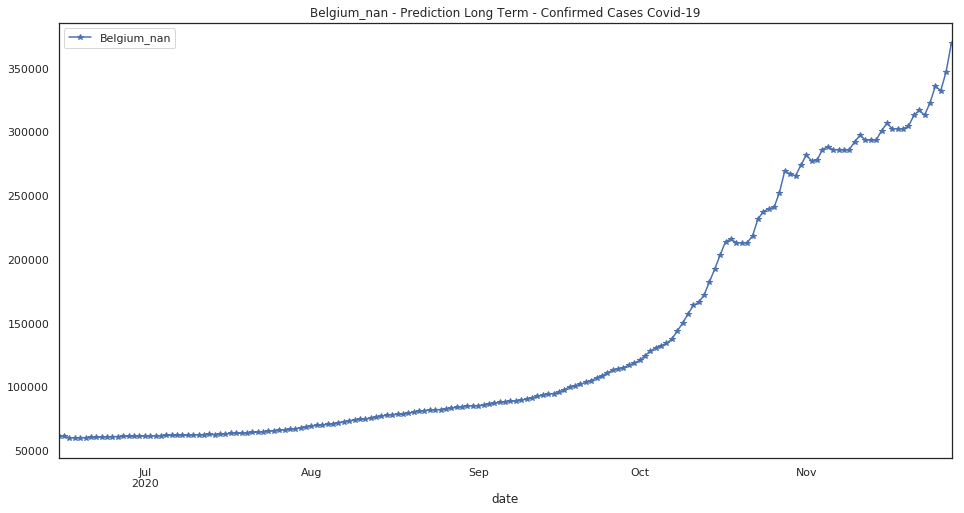

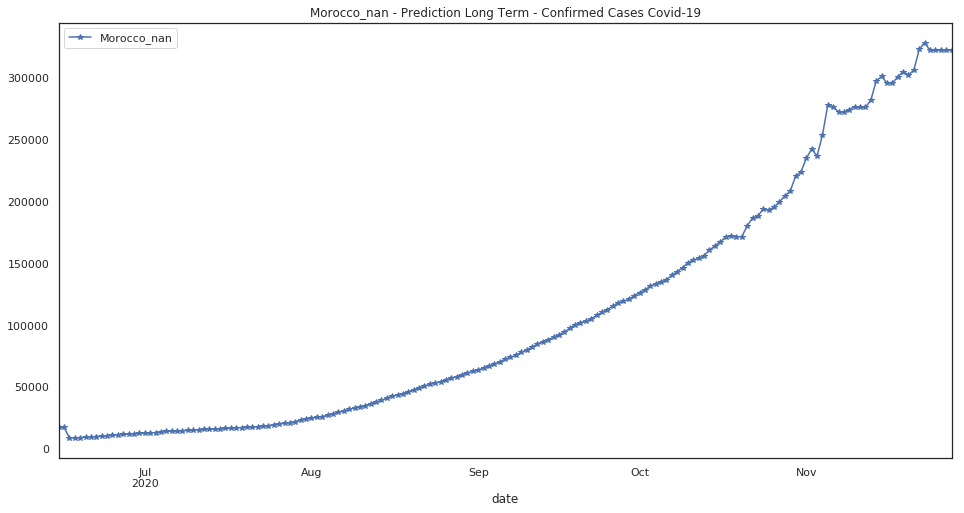

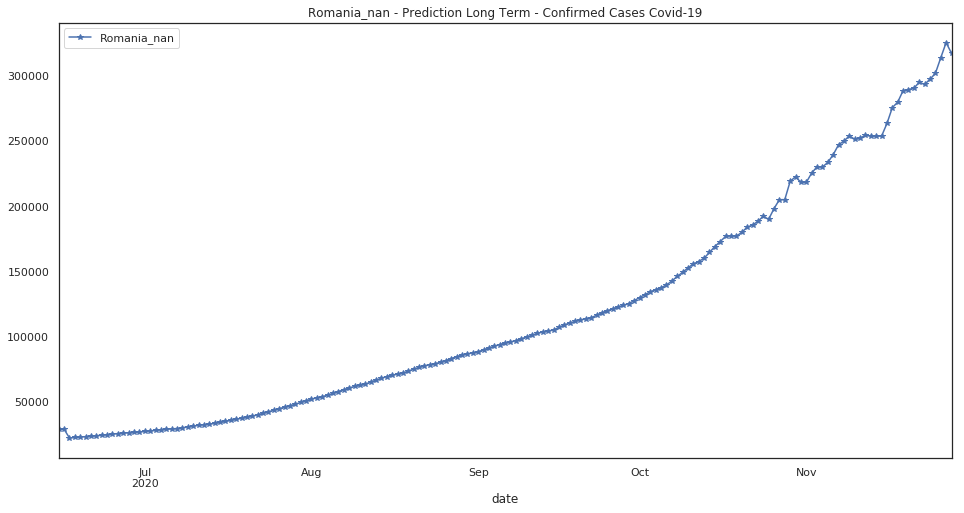

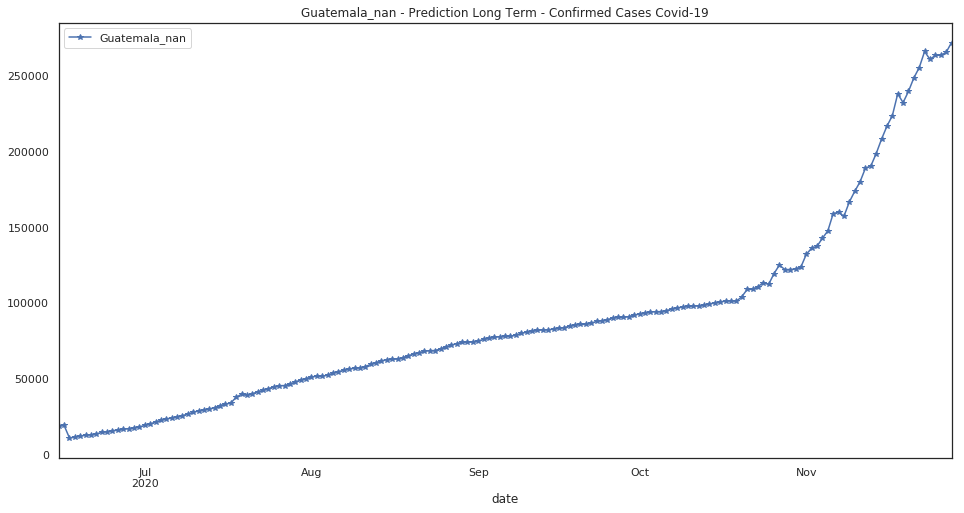

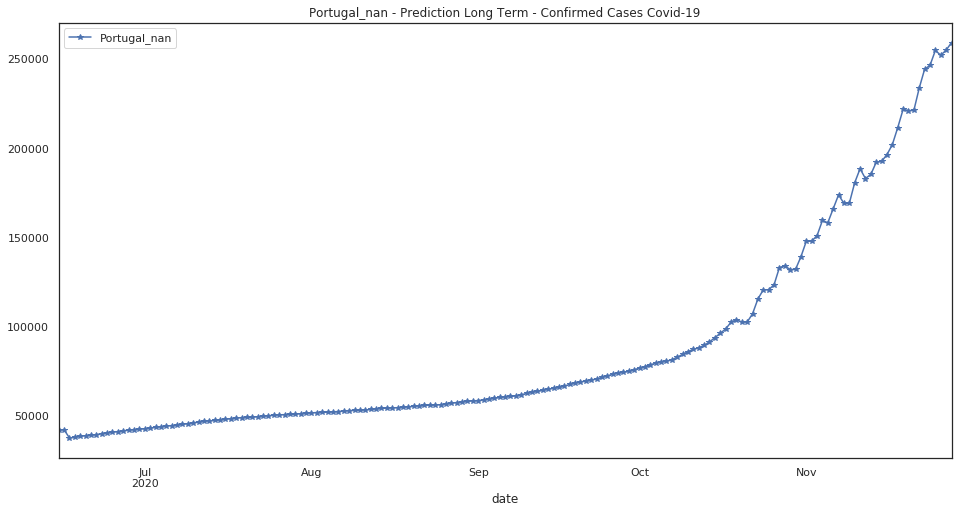

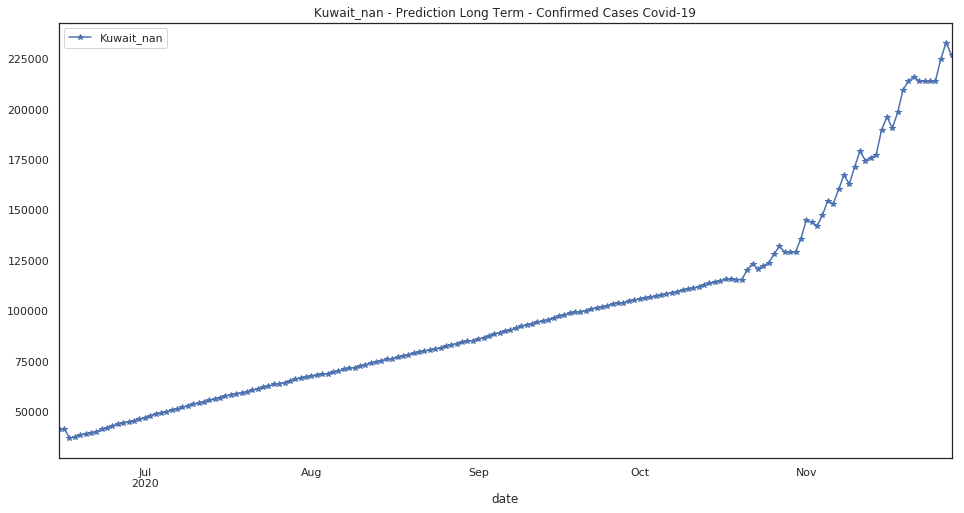

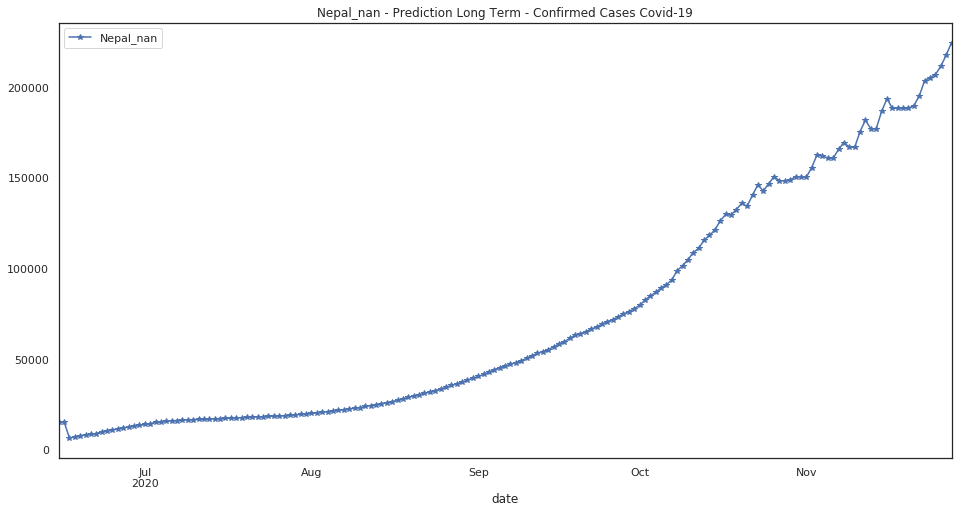

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

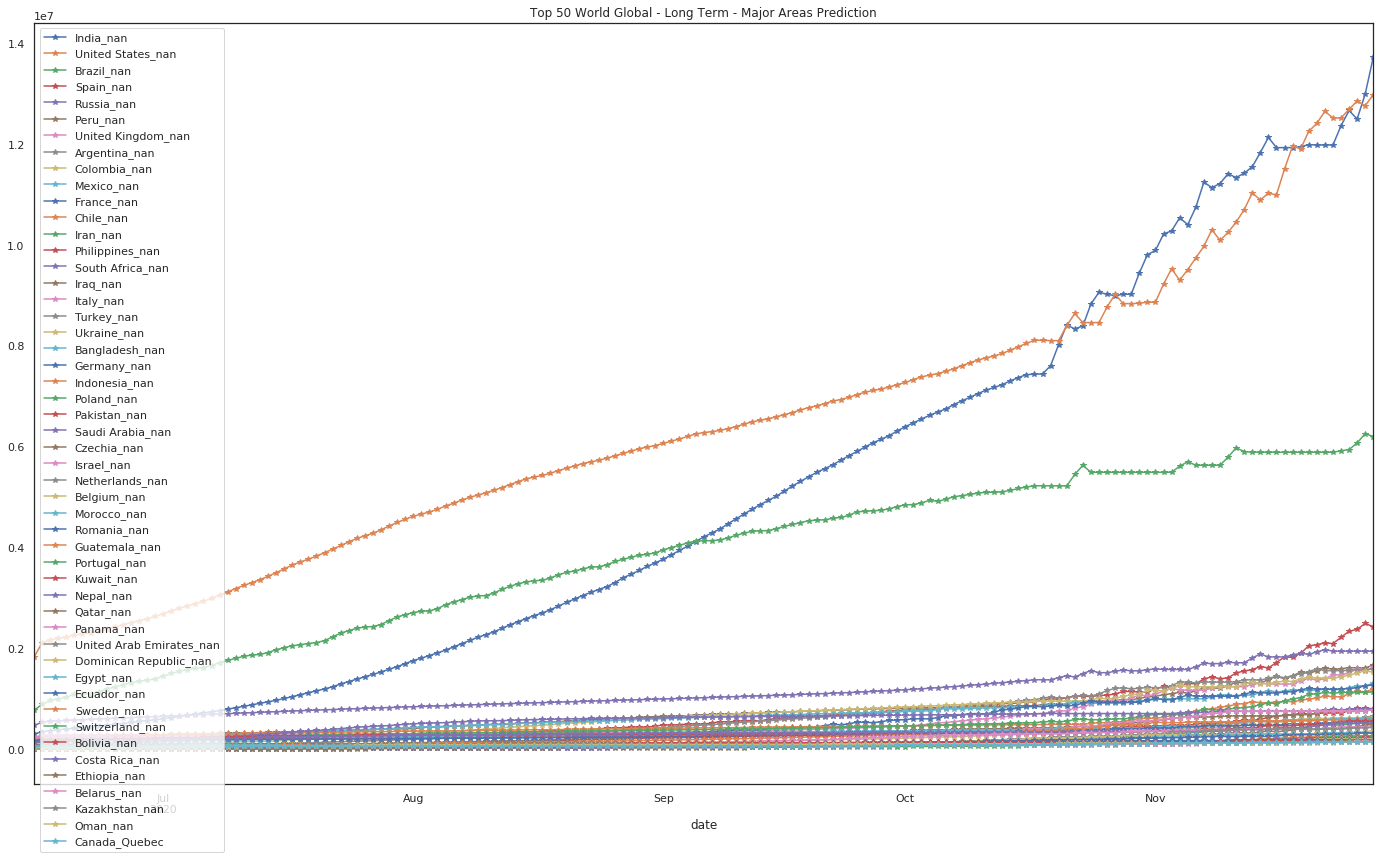

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

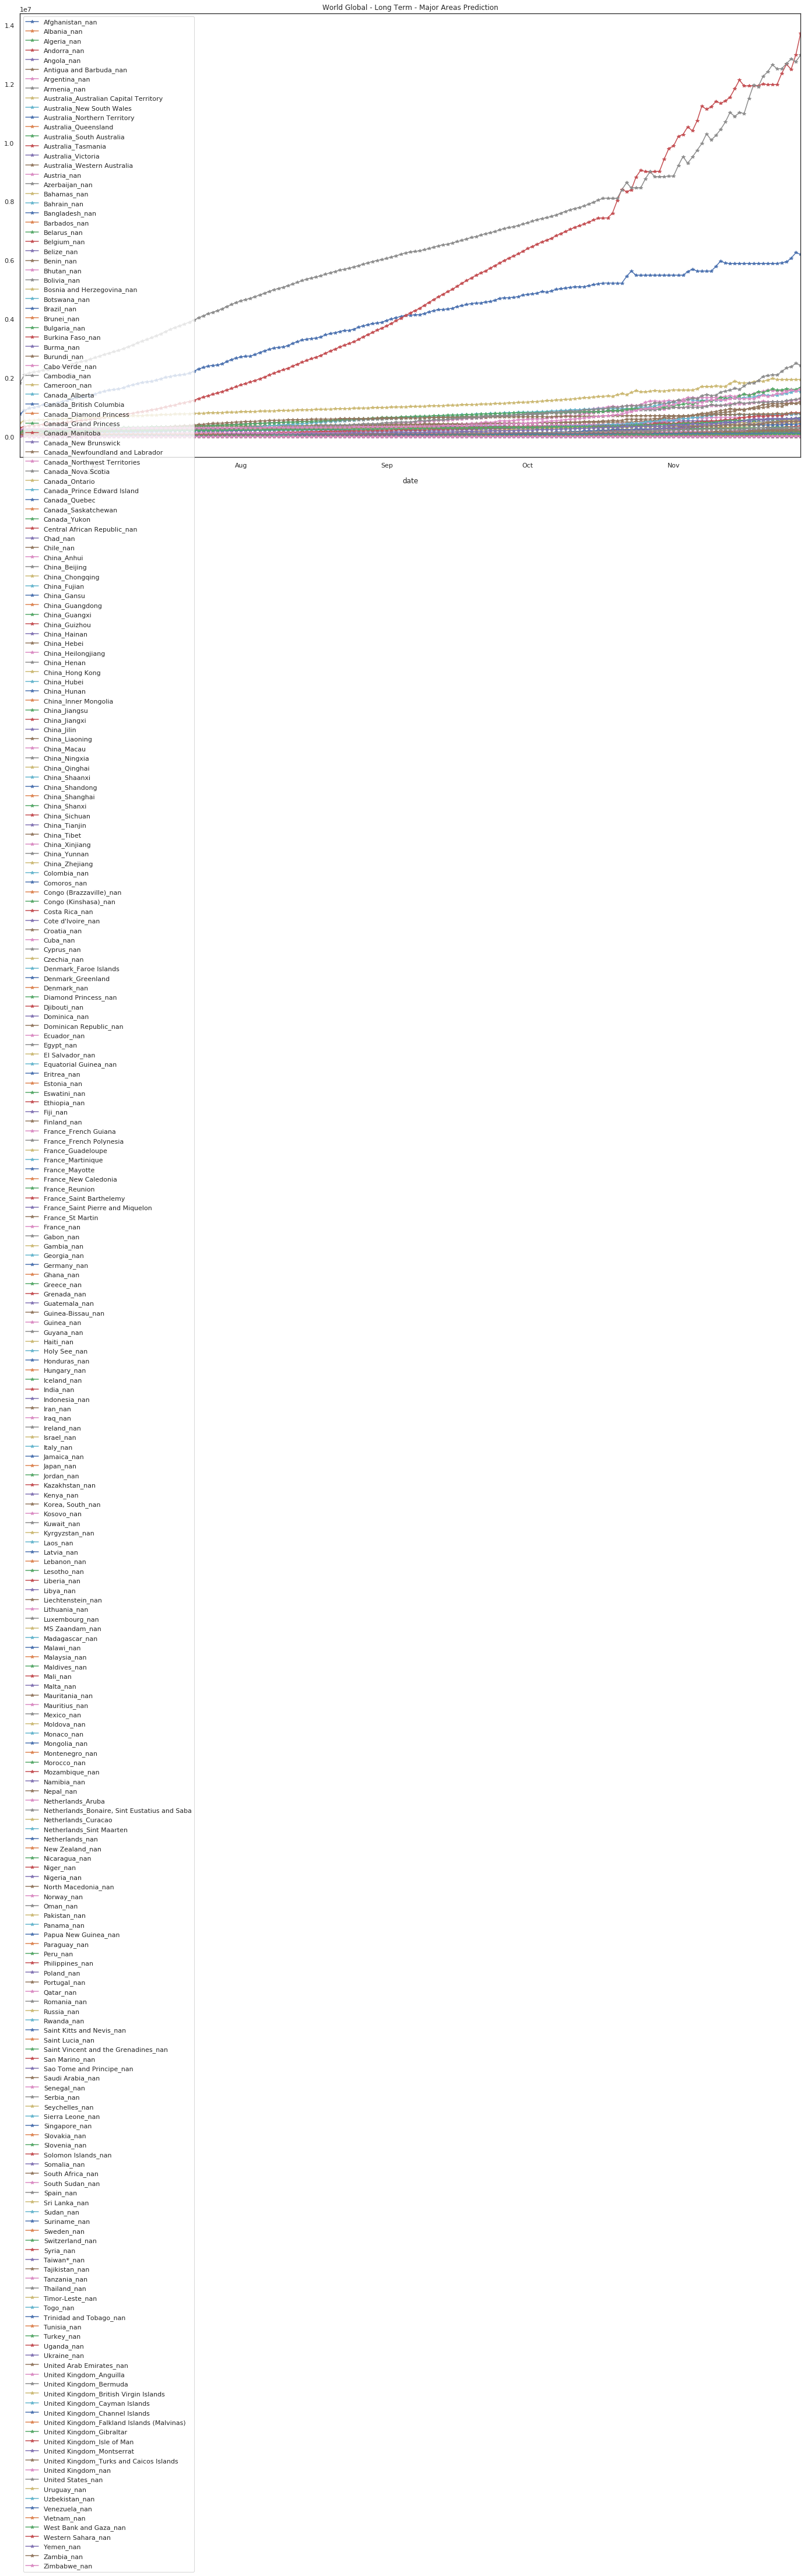

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-07-30          36637.0       5204.0      29850.0       1003.0   
2020-07-31          36756.0       5308.0      30418.0       1082.0   
2020-08-01          36822.0       5439.0      30972.0       1094.0   
2020-08-02          36797.0       5509.0      31496.0       1120.0   
2020-08-03          36823.0       5614.0      31999.0       1128.0   
2020-08-04          36878.0       5772.0      32531.0       1008.0   
2020-08-05          36924.0       5876.0      33091.0       1119.0   
2020-08-06          36991.0       5999.0      33666.0       1140.0   
2020-08-07          37109.0       6154.0      34206.0       1094.0   
2020-08-08          37173.0       6276.0      34731.0       1041.0   
2020-08-09          37151.0       6425.0      35213.0       1157.0   
2020-08-10          37234.0       6542.0      35737.0       1161.0   
2020-08-11          37377.0       6695.0      36264.0       1076.0   
2020-08-12          37452.0       6824.0      36743.0       1171.0   
2020-08-13          37515.0       6978.0      37234.0       1045.0   
2020-08-14          37535.0       7117.0      37716.0       1154.0   
2020-08-15          37621.0       7272.0      38184.0       1118.0   
2020-08-16          37712.0       7401.0      38638.0       1192.0   
2020-08-17          37695.0       7540.0      39077.0       1204.0   
2020-08-18          37684.0       7692.0      39501.0       1052.0   
2020-08-19          37691.0       7823.0      39903.0       1230.0   
2020-08-20          37917.0       7980.0      40312.0       1057.0   
2020-08-21          38059.0       8138.0      40728.0       1254.0   
2020-08-22          38035.0       8298.0      41131.0       1069.0   
2020-08-23          38088.0       8450.0      41524.0       1263.0   
2020-08-24          38148.0       8630.0      41920.0       1276.0   
2020-08-25          38171.0       8775.0      42298.0       1132.0   
2020-08-26          38198.0       8958.0      42679.0       1308.0   
2020-08-27          38226.0       9110.0      43084.0       1098.0   
2020-08-28          38236.0       9237.0      43475.0       1355.0   
...                     ...          ...          ...          ...   
2020-10-30          49835.0      21263.0      60673.0       4423.0   
2020-10-31          51473.0      21283.0      60901.0       4748.0   
2020-11-01          50574.0      21230.0      60759.0       4680.0   
2020-11-02          50964.0      22496.0      62792.0       4743.0   
2020-11-03          54060.0      22825.0      65142.0       4755.0   
2020-11-04          55313.0      23689.0      64715.0       4949.0   
2020-11-05          54285.0      24880.0      64344.0       4607.0   
2020-11-06          55380.0      25020.0      64344.0       5238.0   
2020-11-07          56387.0      24831.0      64344.0       4893.0   
2020-11-08          55837.0      24879.0      65138.0       5345.0   
2020-11-09          55837.0      24921.0      68215.0       5502.0   
2020-11-10          57516.0      24975.0      69422.0       5249.0   
2020-11-11          58586.0      24986.0      68279.0       5785.0   
2020-11-12          57814.0      24998.0      68279.0       5589.0   
2020-11-13          57814.0      25017.0      68497.0       5801.0   
2020-11-14          59391.0      26130.0      68449.0       5885.0   
2020-11-15          61879.0      26500.0      68449.0       5754.0   
2020-11-16          62016.0      26231.0      68451.0       6213.0   
2020-11-17          61942.0      26231.0      68963.0       5833.0   
2020-11-18          62555.0      26458.0      71845.0       6298.0   
2020-11-19          63572.0      27735.0      73227.0       6291.0   
2020-11-20          66053.0      28762.0      71983.0       6387.0   
2020-11-21          69071.0      28677.0      71983.0       6266.0   
2020-11-22          69834.0      28521.0      71983.0       6701.0   
2020-11-23

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
239                                Thailand_nan  15.870032  100.992541   
240                             Timor-Leste_nan  -8.874217  125.727539   
241                                    Togo_nan   8.619500    0.824800   
242                     Trinidad and Tobago_nan  10.691800  -61.222500   
243                                 Tunisia_nan  33.886917    9.537499   
244                                  Turkey_nan  38.963700   35.243300   
245                           United States_nan  40.000000 -100.000000   
246                                  Uganda_nan   1.373333   32.290275   
247                                 Ukraine_nan  48.379400   31.165600   
248                    United Arab Emirates_nan  23.424076   53.847818   
249                     United Kingdom_Anguilla  18.220600  -63.068600   
250                      United Kingdom_Bermuda  32.307800  -64.750500   
251       United Kingdom_British Virgin Islands  18.420700  -64.640000   
252               United Kingdom_Cayman Islands  19.313300  -81.254600   
253              United Kingdom_Channel Islands  49.372300   -2.364400   
254  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
255                    United Kingdom_Gibraltar  36.140800   -5.353600   
256                  United Kingdom_Isle of Man  54.236100   -4.548100   
257                   United Kingdom_Montserrat  16.742498  -62.187366   
258     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
259                          United Kingdom_nan  55.378100   -3.436000   
260                                 Uruguay_nan -32.522800  -55.765800   
261                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      20            Bangladesh_nan  23.685000   90.356300   
2      22               Belarus_nan  53.709800   27.953400   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      50             Canada_Quebec  52.939900  -73.549100   
7      55                 Chile_nan -35.675100  -71.543000   
8      89              Colombia_nan   4.570900  -74.297300   
9      93            Costa Rica_nan   9.748900  -83.753400   
10     98               Czechia_nan  49.817500   15.473000   
11    105    Dominican Republic_nan  18.735700  -70.162700   
12    106               Ecuador_nan  -1.831200  -78.183400   
13    107                 Egypt_nan  26.820553   30.802498   
14    113              Ethiopia_nan   9.145000   40.489700   
15    126                France_nan  46.227600    2.213700   
16    131               Germany_nan  51.165691   10.451526   
17    135             Guatemala_nan  15.783500  -90.230800   
18    144                 India_nan  20.593684   78.962880   
19    145             Indonesia_nan  -0.789300  113.921300   
20    146                  Iran_nan  32.427908   53.688046   
21    147                  Iraq_nan  33.223191   43.679291   
22    149                Israel_nan  31.046051   34.851612   
23    150                 Italy_nan  41.871940   12.567380   
24    154            Kazakhstan_nan  48.019600   66.923700   
25    158                Kuwait_nan  29.311660   47.481766   
26    162               Lebanon_nan  33.854700   35.862300   
27    163               Lebanon_nan  33.854700   35.862300   
28    179                Mexico_nan  23.634500 -102.552800   
29    184               Morocco_nan  31.791700   -7.092600   
30    187                 Nepal_nan  28.166700   84.250000   
31    192           Netherlands_nan  52.132600    5.291300   
32    199                  Oman_nan  21.512583   55.923255   
33    200              Pakistan_nan  30.375300   69.345100   
34    201                Panama_nan   8.538000  -80.782100   
35    204                  Peru_nan  -9.190000  -75.015200   
36    205           Philippines_nan  12.879721  121.774017   
37    206                Poland_nan  51.919400   19.145100   
38    207              Portugal_nan  39.399900   -8.224500   
39    208                 Qatar_nan  25.354800   51.183900   
40    209               Romania_nan  45.943200   24.966800   
41    210                Russia_nan  61.524010  105.318756   
42    217          Saudi Arabia_nan  23.885942   45.079162   
43    227          South Africa_nan -30.559500   22.937500   
44    229                 Spain_nan  40.463667   -3.749220   
45    233                Sweden_nan  60.128161   18.643501   
46    234           Switzerland_nan  46.818200    8.227500   
47    244                Turkey_nan  38.963700   35.243300   
48    245         United States_nan  40.000000 -100.000000   
49    247               Ukraine_nan  48.379400   31.165600   
50    248  United Arab Emirates_nan  23.424076   53.847818   
51    259        United Kingdom_nan  55.378100   -3.436000   

    2020-06-15 00:00:00  2020-06-16 00:00:00  2020-06-17 00:00:00  \
0               38036.0              39220.0              34933.0   
1               87874.0              91202.0              99051.0   
2               56904.0              57498.0              55406.0   
3               61575.0              61622.0              60155.0   
4               26220.0              26918.0              19883.0   
5              775246.0             888271.0             971419.0   
6               56365.0              56444.0              54146.0   
7              193951.0             213715.0             222411.0   
8               55511.0              57120.0              56704.0   
9               11287.0    

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()